Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">Markus</p>| <p style="text-align: left">Frohmann</p> | *EDIT!* |
| <p style="text-align: left">Tobias</p>| <p style="text-align: left">Morocutti</p> | k12008172 |


<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2022/23)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sentence) classification model using (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f083887a040183c5bebe366b04/43388/4737518022038762454/nlp2022_23_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (4 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (4 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (4 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other methods discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

**Dimensionality reduction (3 points).** Reduce vectors' dimensions to $k$ by applying Latent Semantic Analysis (LSA) to the vectors of both variations. $k$ is a hyper-parameter and can be $10<k<1000$. Keep in mind the training and inference phases of LSA, when applied to the train, validation, and test sets. 

At the end of Task A, you should have the <ins>four feature vectors variations</ins> shown below, each consisting of the sets of train, validation, and test:
- **`Token Weighting I - High Dimensional`**
- **`Token Weighting I - Low Dimensional`**
- **`Token Weighting II - High Dimensional`**
- **`Token Weighting II - Low Dimensional`**


</div>

# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import re
import nltk

In [2]:
# Load the train, validation, and test sets
BASE_DIR = 'data/nlp2022_23_data/'
TRAIN_FILE = BASE_DIR + 'thedeep.subset' + '.train.txt'
VAL_FILE = BASE_DIR + 'thedeep.subset' + '.validation.txt' 
TEST_FILE = BASE_DIR + 'thedeep.subset' + '.test.txt'
LABEL_FILE = BASE_DIR + 'thedeep.' + 'labels.txt'

train_df = pd.read_csv(TRAIN_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
val_df = pd.read_csv(VAL_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
test_df = pd.read_csv(TEST_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
label_df = pd.read_csv(LABEL_FILE, sep=',', header=None, names=['label', 'caption'])

In [3]:
train_df

,sentence_id,text,label
0,5446,In addition to the immediate life-saving inter...,9
1,8812,There are approximately 2.6 million people cla...,3
2,16709,"While aid imports have held up recently, comme...",5
3,3526,Heavy rainfalls as well as onrush of water fro...,0
4,4928,"Based on field reports 9 , the main production...",3
...,...,...,...
12105,12744,The total gap in the number of people who requ...,8
12106,9655,A food crisis is looming in the country with t...,0
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4
12108,923,As South India grapples with drought and water...,11


In [4]:
# print length of each set
print('Train set length: ', len(train_df))
print('Validation set length: ', len(val_df))
print('Test set length: ', len(test_df))

Train set length:  12110
Validation set length:  2596
Test set length:  2595


In [5]:
# print average length of text in each set
print('Average length of text in train set: ', np.round(np.mean(train_df['text'].str.len()), 2))
print('Average length of text in validation set: ', np.round(np.mean(val_df['text'].str.len()), 2))
print('Average length of text in test set: ', np.round(np.mean(test_df['text'].str.len()), 2))

Average length of text in train set:  450.86
Average length of text in validation set:  446.5
Average length of text in test set:  440.51


In [6]:
label_df

,label,caption
0,0,Agriculture
1,1,Cross
2,2,Education
3,3,Food
4,4,Health
5,5,Livelihood
6,6,Logistic
7,7,NFI
8,8,Nutrition
9,9,Protection


Each label corresponds to a given caption, i.e., a category.

In [7]:
def map_label_to_caption(label):
    """
    Map label id to caption using label_df
    :param label: label id, int
    :return: label caption, str
    """
    return label_df[label_df['label'] == label]['caption'].values[0]

In [8]:
train_df = train_df.assign(caption=train_df['label'].apply(map_label_to_caption))
val_df = val_df.assign(caption=val_df['label'].apply(map_label_to_caption))
test_df = test_df.assign(caption=test_df['label'].apply(map_label_to_caption))

## Clean text

In [9]:
# remove punctuation marks, replace dates & numbers, apply case-sensitivity
def clean_text(text):
    """
    Clean text by removing punctuation marks, replacing dates & numbers, applying case-sensitivity
    :param text: text to clean, str
    :return: cleaned text, str
    """
    # remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    # replace dates
    text = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', '< date >', text)
    # replace numbers
    text = re.sub(r'\d+', '< num >', text)
    # apply case-sensitivity
    text = text.lower()
    return text

In [10]:
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
val_df['cleaned_text'] = val_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

In [11]:
train_df

,sentence_id,text,label,caption,cleaned_text
0,5446,In addition to the immediate life-saving inter...,9,Protection,in addition to the immediate lifesaving interv...
1,8812,There are approximately 2.6 million people cla...,3,Food,there are approximately < num > million people...
2,16709,"While aid imports have held up recently, comme...",5,Livelihood,while aid imports have held up recently commer...
3,3526,Heavy rainfalls as well as onrush of water fro...,0,Agriculture,heavy rainfalls as well as onrush of water fro...
4,4928,"Based on field reports 9 , the main production...",3,Food,based on field reports < num > the main produ...
...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,Nutrition,the total gap in the number of people who requ...
12106,9655,A food crisis is looming in the country with t...,0,Agriculture,a food crisis is looming in the country with t...
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,Health,acute watery diarrhoea awd continues to be re...
12108,923,As South India grapples with drought and water...,11,WASH,as south india grapples with drought and water...


In [12]:
# normalize text
def normalize_text(text):
    """
    Normalize text by tokenizing and lemmatizing
    :param text: text to normalize, str
    :return: normalized text, str
    """
    # tokenize text
    tokens = nltk.word_tokenize(text)
    # lemmatize text
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tobias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/tobias/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/tobias/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
train_df['normalized_text'] = train_df['cleaned_text'].apply(normalize_text)

## Tokenization

In [17]:
# use BPE tokenizer
from tokenizers import Tokenizer
from tokenizers.models import BPE
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))

from tokenizers.trainers import BpeTrainer
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])

from tokenizers.pre_tokenizers import Whitespace
tokenizer.pre_tokenizer = Whitespace()

files =[TRAIN_FILE]
tokenizer.train(files, trainer)

In [18]:
# train_df['tokenized_text'] = train_df['cleaned_text'].apply(tokenizer.encode).apply(lambda x: x.tokens)
# train_df['tokenized_text']

In [19]:
# use NLTK tokenizer (TreebankWordTokenizer)
from nltk.tokenize import word_tokenize
train_df['tokenized_text'] = train_df['cleaned_text'].apply(word_tokenize)
val_df['tokenized_text'] = val_df['cleaned_text'].apply(word_tokenize)
test_df['tokenized_text'] = test_df['cleaned_text'].apply(word_tokenize)

## Stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tobias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
train_df['tokenized_text'] = train_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
val_df['tokenized_text'] = val_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
test_df['tokenized_text'] = test_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

## Compare

In [22]:
# compare text before preprocessing, after preprocessing, and after tokenization
def compare_text(text, cleaned_text, tokenized_text):
    """
    Compare text before preprocessing, after preprocessing, and after tokenization
    :param text: text before preprocessing, str
    :param cleaned_text: text after preprocessing, str
    :param tokenized_text: text after tokenization, list
    :return: None
    """
    print('Text before preprocessing: \n', text)
    print('Text after preprocessing: \n', cleaned_text)
    print('Text after tokenization: \n', tokenized_text, end='\n\n')

In [23]:
idx = 2

compare_text(train_df['text'][idx], train_df['cleaned_text'][idx], train_df['tokenized_text'][idx])

Text before preprocessing: 
 While aid imports have held up recently, commercial food and fuel imports remain well short of pre-blockade averages. I am particularly concerned about the recent decline of commercial food imports through the Red Sea ports. Pressure on the currency and a liquidity crisis in the Yemeni banking system make imports less viable for traders. Confidence among commercial shipping companies has eroded due to delays, including as a result of inspections undertaken by the Saudiled Coalition after these vessels have been cleared by UNVIM.
Text after preprocessing: 
 while aid imports have held up recently commercial food and fuel imports remain well short of preblockade averages i am particularly concerned about the recent decline of commercial food imports through the red sea ports pressure on the currency and a liquidity crisis in the yemeni banking system make imports less viable for traders confidence among commercial shipping companies has eroded due to delays i

In [24]:
idx = 42

compare_text(train_df['text'][idx], train_df['cleaned_text'][idx], train_df['tokenized_text'][idx])

Text before preprocessing: 
  According to media reports, in 2017 and as of 9 October 2017, 100 possible cholera cases have been reported in Saptari region in Nepal. 
Text after preprocessing: 
  according to media reports in < num > and as of < num > october < num > < num > possible cholera cases have been reported in saptari region in nepal 
Text after tokenization: 
 ['according', 'media', 'reports', '<', 'num', '>', '<', 'num', '>', 'october', '<', 'num', '>', '<', 'num', '>', 'possible', 'cholera', 'cases', 'reported', 'saptari', 'region', 'nepal']



In [25]:
idx = 100

compare_text(train_df['text'][idx], train_df['cleaned_text'][idx], train_df['tokenized_text'][idx])

Text before preprocessing: 
 With Sao Tome heavily dependent on food imports, food availability is unpredictable: there is no deep sea port; in bad weather, landing is difficult on the country’s one short airstrip. No cereals are cultivated on the island. The country is prone to natural disasters such as floods and landslides, which negatively affect crops and road access as well as destroy houses and household assets.
Text after preprocessing: 
 with sao tome heavily dependent on food imports food availability is unpredictable there is no deep sea port in bad weather landing is difficult on the countrys one short airstrip no cereals are cultivated on the island the country is prone to natural disasters such as floods and landslides which negatively affect crops and road access as well as destroy houses and household assets
Text after tokenization: 
 ['sao', 'tome', 'heavily', 'dependent', 'food', 'imports', 'food', 'availability', 'unpredictable', 'deep', 'sea', 'port', 'bad', 'weathe

# Dictionary

In [26]:
# create dictionary using train set
def create_dictionary(tokenized_text):
    """
    Create dictionary using train set
    :param tokenized_text: tokenized text, list
    :return: dictionary, dict
    """
    dictionary = {}
    for tokens in tokenized_text:
        for token in tokens:
            if token not in dictionary:
                dictionary[token] = 1
            else:
                dictionary[token] += 1
    return dictionary

In [27]:
dictionary = create_dictionary(train_df['tokenized_text'])

In [28]:
# print length of dictionary
print('Length of dictionary: ', len(dictionary))

Length of dictionary:  30396


In [29]:
# print most common words in dictionary
print('Most common words in dictionary: ', sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words in dictionary:  [('<', 41249), ('num', 41249), ('>', 41249), ('cases', 4758), ('food', 4138), ('people', 3799), ('reported', 3676), ('children', 2894), ('areas', 2551), ('water', 2519)]


In [30]:
# keep only top-N most frequent words
# removing any word with a lower frequency than a threshold
# OOV (out-of-vocabulary) words will be replaced with the <oov> token
def clean_dictionary(dictionary, N: int, threshold: int):
    """
    Clean dictionary by keeping only top-N most frequent words and removing any word with a lower frequency than a threshold
    :param dictionary: dictionary, dict
    :param N: top-N most frequent words, int
    :param threshold: threshold of word frequency, int
    :return: cleaned dictionary, dict
    """
    # keep only top-N most frequent words
    dictionary = dict(sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:N])

    # replace any word with a lower frequency than a threshold
    for key, value in dictionary.copy().items():
        if value < threshold:
            dictionary['<oov>'] = dictionary.get('<oov>', 0) + value
            dictionary.pop(key)
    return dictionary

In [31]:
dictionary = clean_dictionary(dictionary, N=100_000, threshold=5)

In [32]:
# print length of dictionary
print('Length of dictionary: ', len(dictionary))

Length of dictionary:  8195


In [33]:
sorted(dictionary.items(), key=lambda x: x[1], reverse=True)

[('<', 41249),
 ('num', 41249),
 ('>', 41249),
 ('<oov>', 33980),
 ('cases', 4758),
 ('food', 4138),
 ('people', 3799),
 ('reported', 3676),
 ('children', 2894),
 ('areas', 2551),
 ('water', 2519),
 ('health', 2476),
 ('said', 1919),
 ('access', 1829),
 ('including', 1793),
 ('per', 1703),
 ('also', 1690),
 ('percent', 1657),
 ('due', 1639),
 ('affected', 1638),
 ('since', 1600),
 ('deaths', 1469),
 ('number', 1406),
 ('households', 1390),
 ('total', 1354),
 ('humanitarian', 1322),
 ('two', 1320),
 ('security', 1309),
 ('million', 1298),
 ('week', 1298),
 ('one', 1285),
 ('prices', 1268),
 ('new', 1246),
 ('cent', 1234),
 ('refugees', 1230),
 ('state', 1221),
 ('country', 1169),
 ('government', 1165),
 ('year', 1154),
 ('displaced', 1148),
 ('assistance', 1136),
 ('according', 1119),
 ('cholera', 1116),
 ('need', 1115),
 ('phase', 1114),
 ('suspected', 1080),
 ('south', 1079),
 ('high', 1070),
 ('acute', 1063),
 ('ipc', 1060),
 ('may', 1038),
 ('women', 1038),
 ('many', 1028),
 ('regio

In [34]:
# print most common words in dictionary
print('Most common words in dictionary: ', sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:10])
print('Least common words in dictionary: ', sorted(dictionary.items(), key=lambda x: x[1], reverse=False)[:10])

Most common words in dictionary:  [('<', 41249), ('num', 41249), ('>', 41249), ('<oov>', 33980), ('cases', 4758), ('food', 4138), ('people', 3799), ('reported', 3676), ('children', 2894), ('areas', 2551)]
Least common words in dictionary:  [('banking', 5), ('averaged', 5), ('yearthe', 5), ('droughtinduced', 5), ('secondlargest', 5), ('jilaal', 5), ('oppression', 5), ('teenage', 5), ('slum', 5), ('usaidfunded', 5)]


# Creating Sentence Vectors

## TF-IDF

In [35]:
# define term frequency
def term_frequency(word, tokenized_text):
    """
    Calculate term frequency
    :param word: word, str
    :param tokenized_text: tokenized text, list
    :return: term frequency, float
    """
    return np.log(tokenized_text.count(word) + 1)

# define inverse document frequency
def inverse_document_frequency(word, tokenized_text_list):
    """
    Calculate inverse document frequency
    :param word: word, str
    :param tokenized_text_list: list of tokenized texts, list
    :return: inverse document frequency, float
    """
    num_texts_containing_word = sum(word in tokenized_text for tokenized_text in tokenized_text_list)
    return np.log(len(tokenized_text_list) / (1 + num_texts_containing_word))

# define tf-idf
def tf_idf(word, tokenized_text, tokenized_text_list):
    """
    Calculate tf-idf
    :param word: word, str
    :param tokenized_text: tokenized text, list
    :param tokenized_text_list: list of tokenized texts, list
    :return: tf-idf, float
    """
    return term_frequency(word, tokenized_text) * inverse_document_frequency(word, tokenized_text_list)

In [36]:
# test
print('TF-IDF of word "num" in text 1: ', tf_idf('num', train_df['tokenized_text'][0], train_df['tokenized_text']))

TF-IDF of word "num" in text 1:  0.23354538677276349


In [37]:
from tqdm.auto import tqdm

# create tf-idf matrix
def create_tf_idf_matrix(tokenized_text_list, dictionary, idf):
    """
    Create tf-idf matrix
    :param tokenized_text_list: list of tokenized texts, list
    :param dictionary: dictionary, dict
    :param idf: idf for all words in dictionary, dict
    :return: tf-idf matrix, np.array
    """
    tf_idf_matrix = np.zeros((len(tokenized_text_list), len(dictionary)))
    for i, tokenized_text in enumerate(tqdm(tokenized_text_list, total=len(tokenized_text_list))):
        for j, word in enumerate(dictionary):
            tf_idf_matrix[i, j] = term_frequency(word, tokenized_text) * idf[word]
    return tf_idf_matrix

In [38]:
# define idf for all words in dictionary using vectorization, from scratch
def idf_all_words(dictionary, tokenized_text_list):
    """
    Calculate idf for all words in dictionary using vectorization, from scratch
    :param dictionary: dictionary, dict
    :param tokenized_text_list: list of tokenized texts, list
    :return: idf for all words in dictionary, dict
    """
    return {word: inverse_document_frequency(word, tokenized_text_list) for word in tqdm(dictionary, total=len(dictionary))}

idf = idf_all_words(dictionary, train_df['tokenized_text'])

  0%|          | 0/8195 [00:00<?, ?it/s]

In [39]:
tf_idf_matrix_train = create_tf_idf_matrix(train_df['tokenized_text'], dictionary, idf)

  0%|          | 0/12110 [00:00<?, ?it/s]

In [40]:
tf_idf_matrix_test = create_tf_idf_matrix(test_df['tokenized_text'], dictionary, idf)
tf_idf_matrix_val = create_tf_idf_matrix(val_df['tokenized_text'], dictionary, idf)

  0%|          | 0/2595 [00:00<?, ?it/s]

  0%|          | 0/2596 [00:00<?, ?it/s]

In [41]:
import pickle as pkl
pkl.dump(tf_idf_matrix_train, open('tf_idf_matrix_train.pkl', 'wb'))
pkl.dump(tf_idf_matrix_test, open('tf_idf_matrix_test.pkl', 'wb'))
pkl.dump(tf_idf_matrix_val, open('tf_idf_matrix_val.pkl', 'wb'))

In [42]:
tf_idf_matrix_train

array([[0.23354539, 0.23354539, 0.23354539, ..., 0.        , 0.        ,
        0.        ],
       [0.70063616, 0.70063616, 0.70063616, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.46709077, 0.46709077, 0.46709077, ..., 0.        , 0.        ,
        0.        ]])

In [78]:
# print shape of tf-idf matrix
selected_word = list(dictionary.keys())[1]
print('Shape of tf-idf matrix: ', tf_idf_matrix_train.shape)
print(f'Average tf-idf value of word "{selected_word}" in text 1: ', tf_idf_matrix_train[0, list(dictionary.keys()).index(selected_word)])

Shape of tf-idf matrix:  (12110, 8195)
Average tf-idf value of word "num" in text 1:  0.23354538677276349


In [79]:
list(dictionary.keys()).index(list(dictionary.keys())[0])

0

## BM25

In [45]:
# define BM25
avg_len_text = np.mean([len(tokenized_text) for tokenized_text in train_df['tokenized_text']])

def bm25(word, tokenized_text, tokenized_text_list, idf=idf, k=1.4, b=0.9):
    """
    Calculate BM25
    :param word: word, str
    :param tokenized_text: tokenized text, list
    :param tokenized_text_list: list of tokenized texts, list
    :param k: k, float
    :param b: b, float
    :return: BM25, float
    """
    return idf[word] * (term_frequency(word, tokenized_text) * (k + 1)) / (term_frequency(word, tokenized_text) + k * (1 - b + b * len(tokenized_text) / avg_len_text))

In [46]:
# test
print('BM25 of word "num" in text 1: ', bm25('num', train_df['tokenized_text'][0], train_df['tokenized_text']))

BM25 of word "num" in text 1:  0.44945051332030167


In [47]:
idf

{'<': 0.3369347713195608,
 'num': 0.3369347713195608,
 '>': 0.3369347713195608,
 'cases': 1.9106992430122622,
 'food': 1.824664905670459,
 'people': 1.5396746248843896,
 'reported': 1.7587832009864202,
 'children': 1.9106992430122622,
 'areas': 1.917418193261007,
 'water': 2.230898358034633,
 'health': 2.1094496603732606,
 'said': 2.158988913753382,
 'access': 2.194667980339382,
 'including': 2.0972708900869828,
 'per': 2.5938518928472116,
 'also': 2.101314022279339,
 'percent': 2.688830635870068,
 'due': 2.1726729587538363,
 'affected': 2.2653036279568903,
 'since': 2.1618542452266687,
 'deaths': 2.5687551037609375,
 'number': 2.3691625755191317,
 'households': 2.6851920630261596,
 'total': 2.4673896266185795,
 'humanitarian': 2.52862300233462,
 'two': 2.389671542240758,
 'security': 2.500049629890564,
 'million': 2.6460179145628824,
 'week': 2.789745801714046,
 'one': 2.4189240850781957,
 'prices': 2.9325365197513653,
 'new': 2.5327723858814313,
 'cent': 2.97691781264175,
 'refugees'

In [48]:
# create BM25 matrix
def create_bm25_matrix(tokenized_text_list, dictionary, idf):
    """
    Create BM25 matrix
    :param tokenized_text_list: list of tokenized texts, list
    :param dictionary: dictionary, dict
    :param idf: idf for all words in dictionary, dict
    :return: BM25 matrix, np.array
    """
    bm25_matrix = np.zeros((len(tokenized_text_list), len(dictionary)))
    for i, tokenized_text in enumerate(tqdm(tokenized_text_list, total=len(tokenized_text_list))):
        for j, word in enumerate(dictionary):
            bm25_matrix[i, j] = bm25(word, tokenized_text, tokenized_text_list, idf)
    return bm25_matrix

In [49]:
bm25_matrix_train = create_bm25_matrix(train_df['tokenized_text'], dictionary, idf)
bm25_matrix_test = create_bm25_matrix(test_df['tokenized_text'], dictionary, idf)
bm25_matrix_val = create_bm25_matrix(val_df['tokenized_text'], dictionary, idf)

  0%|          | 0/12110 [00:00<?, ?it/s]

  0%|          | 0/2595 [00:00<?, ?it/s]

  0%|          | 0/2596 [00:00<?, ?it/s]

In [50]:

import pickle as pkl
pkl.dump(bm25_matrix_train, open('bm25_matrix_train.pkl', 'wb'))
pkl.dump(bm25_matrix_test, open('bm25_matrix_test.pkl', 'wb'))
pkl.dump(bm25_matrix_val, open('bm25_matrix_val.pkl', 'wb'))

### Comparison

In [93]:
# TODO
diff_matrix = tf_idf_matrix_train - bm25_matrix_train
diff_matrix_where_both_not_zero = diff_matrix[(tf_idf_matrix_train != 0.0) & (bm25_matrix_train != 0.0)]
zero_diff_count = len(diff_matrix[diff_matrix == 0.0])
zero_diff_count_where_both_not_zero = len(diff_matrix_where_both_not_zero[diff_matrix_where_both_not_zero == 0.0])

print(f"How often the difference equals 0: {zero_diff_count}")
print(f"How often the corresponding values of tf_idf and bm25 are equal but are not equal to zero: {zero_diff_count_where_both_not_zero}")

How often the difference equals 0: 98834136
How often the corresponding values of tf_idf and bm25 are equal but are not equal to zero: 0


In [88]:
np.mean(diff_matrix_where_both_not_zero), np.mean(np.abs(diff_matrix_where_both_not_zero))

(-0.05604833369230368, 1.1319777004100788)

In [89]:
np.mean(tf_idf_matrix_train), np.mean(bm25_matrix_train)

(0.0129877558701921, 0.013217793530761881)

In [91]:
np.std(tf_idf_matrix_train), np.std(bm25_matrix_train)

(0.22325402288504834, 0.2384040880711321)

### Sparsity

In [52]:
# Calculate and report the sparsity rate of the vectors of train, validation, and test sets,
# namely what percentages of the vectors in each set are filled with zeros.

# sparsity of tf-idf
print('Sparsity of tf-idf matrix, train set: ', 1 - np.count_nonzero(tf_idf_matrix_train) / tf_idf_matrix_train.size)
print('Sparsity of tf-idf matrix, validation set: ', 1 - np.count_nonzero(tf_idf_matrix_val) / tf_idf_matrix_val.size)
print('Sparsity of tf-idf matrix, test set: ', 1 - np.count_nonzero(tf_idf_matrix_test) / tf_idf_matrix_test.size)

Sparsity of tf-idf matrix, train set:  0.9958957270374426
Sparsity of tf-idf matrix, validation set:  0.9959790770237404
Sparsity of tf-idf matrix, test set:  0.9959919637073689


In [53]:
# sparsity of BM25
print('Sparsity of BM25 matrix, train set: ', 1 - np.count_nonzero(bm25_matrix_train) / bm25_matrix_train.size)
print('Sparsity of BM25 matrix, validation set: ', 1 - np.count_nonzero(bm25_matrix_val) / bm25_matrix_val.size)
print('Sparsity of BM25 matrix, test set: ', 1 - np.count_nonzero(bm25_matrix_test) / bm25_matrix_test.size)

Sparsity of BM25 matrix, train set:  0.9958957270374426
Sparsity of BM25 matrix, validation set:  0.9959790770237404
Sparsity of BM25 matrix, test set:  0.9959919637073689


# Dimensionality reduction

In [54]:
# Reduce vectors’ dimensions by applying Latent Semantic Analysis (LSA) to the vectors of both variations.
# Report the sparsity rate of the vectors of train, validation, and test sets after dimensionality reduction.

# LSA
from sklearn.decomposition import TruncatedSVD

k_svd = 100
svd = TruncatedSVD(n_components=k_svd, n_iter=7, random_state=42)
svd.fit(tf_idf_matrix_train)

TruncatedSVD(n_components=100, n_iter=7, random_state=42)

In [55]:
tf_idf_matrix_train_lsa = svd.transform(tf_idf_matrix_train)
tf_idf_matrix_val_lsa = svd.transform(tf_idf_matrix_val)
tf_idf_matrix_test_lsa = svd.transform(tf_idf_matrix_test)

In [56]:
tf_idf_matrix_test_lsa

array([[ 0.69575791, -0.22465822, -0.08211086, ..., -0.1408919 ,
         0.0149918 , -0.23613306],
       [ 2.7280114 , -1.02332209,  1.19054081, ...,  0.77271061,
        -0.40028264,  0.38921487],
       [ 4.43634533,  2.26420834, -0.60081245, ...,  0.79922035,
        -2.37792393,  1.21858432],
       ...,
       [ 1.03428372, -0.38884351,  0.88744841, ..., -0.37965635,
         0.24784295, -0.29555749],
       [ 1.79399647,  0.07872835,  1.41394841, ..., -0.37099971,
         0.39624708, -0.30420575],
       [ 2.32308256, -0.17807667,  0.30095219, ..., -0.46450006,
        -0.07726602,  0.31003912]])

In [57]:
# sparsity of tf-idf after LSA
print('Sparsity of tf-idf matrix after LSA, train set: ', 1 - np.count_nonzero(tf_idf_matrix_train_lsa) / tf_idf_matrix_train_lsa.size)
print('Sparsity of tf-idf matrix after LSA, validation set: ', 1 - np.count_nonzero(tf_idf_matrix_val_lsa) / tf_idf_matrix_val_lsa.size)
print('Sparsity of tf-idf matrix after LSA, test set: ', 1 - np.count_nonzero(tf_idf_matrix_test_lsa) / tf_idf_matrix_test_lsa.size)

Sparsity of tf-idf matrix after LSA, train set:  0.0
Sparsity of tf-idf matrix after LSA, validation set:  0.0
Sparsity of tf-idf matrix after LSA, test set:  0.0


In [58]:
# BM25 after LSA
k_svd = 100
svd = TruncatedSVD(n_components=k_svd, n_iter=7, random_state=42)
svd.fit(bm25_matrix_train)

TruncatedSVD(n_components=100, n_iter=7, random_state=42)

In [59]:
bm25_matrix_train_lsa = svd.transform(bm25_matrix_train)
bm25_matrix_val_lsa = svd.transform(bm25_matrix_val)
bm25_matrix_test_lsa = svd.transform(bm25_matrix_test)

In [60]:
# sparsity of BM25 after LSA
print('Sparsity of BM25 matrix after LSA, train set: ', 1 - np.count_nonzero(bm25_matrix_train_lsa) / bm25_matrix_train_lsa.size)
print('Sparsity of BM25 matrix after LSA, validation set: ', 1 - np.count_nonzero(bm25_matrix_val_lsa) / bm25_matrix_val_lsa.size)
print('Sparsity of BM25 matrix after LSA, test set: ', 1 - np.count_nonzero(bm25_matrix_test_lsa) / bm25_matrix_test_lsa.size)

Sparsity of BM25 matrix after LSA, train set:  0.0
Sparsity of BM25 matrix after LSA, validation set:  0.0
Sparsity of BM25 matrix after LSA, test set:  0.0


<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric throughout the task. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>eight experiment sets</ins> (4 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters (also keep in mind the dimensionality size $k$ in the low-dimensional vectors as yet another hyper-parameter). For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>five different values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected model of the eight experiment on the test set and report the results of the experiments on <ins>both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

# Dummy baseline

In [61]:
y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

In [62]:
# check the distribution of labels in the training set
y_train.value_counts()

4     2829
9     2657
3     2079
10     947
11     754
2      602
8      564
5      559
1      500
0      238
7      226
6      155
Name: label, dtype: int64

In [63]:
train_df['caption'].value_counts()

Health         2829
Protection     2657
Food           2079
Shelter         947
WASH            754
Education       602
Nutrition       564
Livelihood      559
Cross           500
Agriculture     238
NFI             226
Logistic        155
Name: caption, dtype: int64

<AxesSubplot:>

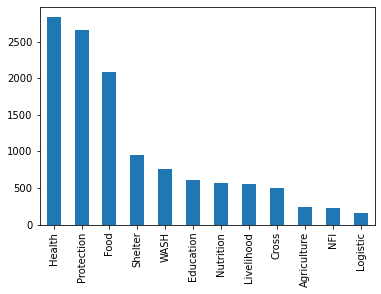

In [64]:
train_df['caption'].value_counts().plot(kind='bar')

In [65]:
train_df

,sentence_id,text,label,caption,cleaned_text,normalized_text,tokenized_text
0,5446,In addition to the immediate life-saving inter...,9,Protection,in addition to the immediate lifesaving interv...,in addition to the immediate lifesaving interv...,"[addition, immediate, lifesaving, intervention..."
1,8812,There are approximately 2.6 million people cla...,3,Food,there are approximately < num > million people...,there are approximately < num > million people...,"[approximately, <, num, >, million, people, cl..."
2,16709,"While aid imports have held up recently, comme...",5,Livelihood,while aid imports have held up recently commer...,while aid import have held up recently commerc...,"[aid, imports, held, recently, commercial, foo..."
3,3526,Heavy rainfalls as well as onrush of water fro...,0,Agriculture,heavy rainfalls as well as onrush of water fro...,heavy rainfall a well a onrush of water from t...,"[heavy, rainfalls, well, onrush, water, upstre..."
4,4928,"Based on field reports 9 , the main production...",3,Food,based on field reports < num > the main produ...,based on field report < num > the main product...,"[based, field, reports, <, num, >, main, produ..."
...,...,...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,Nutrition,the total gap in the number of people who requ...,the total gap in the number of people who requ...,"[total, gap, number, people, require, assistan..."
12106,9655,A food crisis is looming in the country with t...,0,Agriculture,a food crisis is looming in the country with t...,a food crisis is looming in the country with t...,"[food, crisis, looming, country, seasons, maiz..."
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,Health,acute watery diarrhoea awd continues to be re...,acute watery diarrhoea awd continues to be rep...,"[acute, watery, diarrhoea, awd, continues, rep..."
12108,923,As South India grapples with drought and water...,11,WASH,as south india grapples with drought and water...,a south india grapple with drought and water s...,"[south, india, grapples, drought, water, short..."


In [66]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(tf_idf_matrix_train_lsa, y_train)

DummyClassifier(strategy='most_frequent')

In [67]:
# Evaluation on validation set
from sklearn.metrics import accuracy_score

y_pred = dummy_clf.predict(tf_idf_matrix_val_lsa)
print('Accuracy on validation set: ', accuracy_score(y_val, y_pred))

Accuracy on validation set:  0.2561633281972265


# Training and tuning classifiers

 Select at least  two classification algorithms  from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in  eight experiment sets  (4 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters (also keep in mind the dimensionality size   in the low-dimensional vectors as yet another hyper-parameter). For each experiment, select  one of the hyper-parameters and tune its value . The tuning process is done by first assigning at least  five different values  to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter.

In [276]:
from sklearn.metrics import classification_report

clfs = np.array([None] * 8)
val_accs = np.array([0.0] * 8)
y_preds = np.array([None] * 8)

## Algorithm 1: Linear SVM

In [277]:
from sklearn.linear_model import SGDClassifier

### Experiment 1: TF-IDF, high-dimensional data

In [278]:
# tune hyper-parameter alpha
hyper_param_values = [1e-2, 5e-3, 3e-3, 1e-3, 5e-4]
accuracies = []

for hyper_param_value in hyper_param_values:
    
    print(f"Classifier with alpha: {hyper_param_value}")
    
    # fit classifier
    clf = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=hyper_param_value, random_state=42, max_iter=5, tol=None, n_jobs=-1, verbose=1)
    clf.fit(tf_idf_matrix_train, y_train)

    # Evaluation on validation set
    y_pred = clf.predict(tf_idf_matrix_val)
    acc_score = accuracy_score(y_val, y_pred)
    accuracies.append(acc_score)
    print('Accuracy on validation set: ', acc_score)
    print('-' * 20)

Classifier with alpha: 0.01
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Norm: 3.84, NNZs: 35, Bias: -2.811899, T: 12110, Avg. loss: 0.094533
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 3.09, NNZs: 28, Bias: -6.616447, T: 12110, Avg. loss: 0.112654
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 5.89, NNZs: 67, Bias: -1.591763, T: 12110, Avg. loss: 0.235519
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 4.12, NNZs: 40, Bias: -3.415152, T: 12110, Avg. loss: 0.087871
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 3.54, NNZs: 25, Bias: -2.553433, T: 12110, Avg. loss: 0.066481
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 7.20, NNZs: 180, Bias: -1.137275, T: 12110, Avg. loss: 0.347427
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 4.14, NNZs: 51, Bias: -2.407204, T: 12110, Avg. loss: 0.090791
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 6.38, NNZs: 149, Bias: -1.415115, T: 12110, Avg. loss: 0.208460
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 9.26, NNZs: 409, Bias: -0.851784, T: 12110, Avg. loss: 0.420609
Total tr

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    3.4s remaining:   16.9s


Norm: 1.69, NNZs: 27, Bias: -4.729142, T: 60550, Avg. loss: 0.059068
Total training time: 3.42 seconds.
Norm: 3.97, NNZs: 230, Bias: -1.030105, T: 60550, Avg. loss: 0.130959
Total training time: 3.50 seconds.
Norm: 1.83, NNZs: 22, Bias: -1.408565, T: 60550, Avg. loss: 0.035533
Total training time: 3.51 seconds.
Norm: 1.87, NNZs: 32, Bias: -1.156278, T: 60550, Avg. loss: 0.039757
Total training time: 3.52 seconds.
Norm: 2.27, NNZs: 55, Bias: -1.108242, T: 60550, Avg. loss: 0.038603
Total training time: 3.53 seconds.
Norm: 3.43, NNZs: 182, Bias: -1.092912, T: 60550, Avg. loss: 0.103824
Total training time: 3.55 seconds.
Norm: 3.01, NNZs: 126, Bias: -1.002142, T: 60550, Avg. loss: 0.065641
Total training time: 3.58 seconds.
Norm: 4.10, NNZs: 294, Bias: -0.975202, T: 60550, Avg. loss: 0.117505
Total training time: 3.74 seconds.
Norm: 2.98, NNZs: 62, Bias: -1.002952, T: 60550, Avg. loss: 0.088048
Total training time: 3.81 seconds.
Norm: 5.08, NNZs: 541, Bias: -0.797026, T: 60550, Avg. loss:

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Accuracy on validation set:  0.7862095531587057
--------------------
Classifier with alpha: 0.005
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 7.18, NNZs: 181, Bias: -4.817813, T: 12110, Avg. loss: 0.153233
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 6.56, NNZs: 137, Bias: -4.379946, T: 12110, Avg. loss: 0.107127
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 7.24, NNZs: 189, Bias: -4.248526, T: 12110, Avg. loss: 0.110996
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 7.20, NNZs: 174, Bias: -3.209203, T: 12110, Avg. loss: 0.125193
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 5.77, NNZs: 122, Bias: -8.777472, T: 12110, Avg. loss: 0.145994
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 10.70, NNZs: 409, Bias: -2.343858, T: 12110, Avg. loss: 0.340233
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 12.02, NNZs: 625, Bias: -1.103988, T: 12110, Avg. loss: 0.398854
To

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    3.5s remaining:   17.3s


Norm: 6.51, NNZs: 496, Bias: -1.070169, T: 60550, Avg. loss: 0.112177
Total training time: 3.75 seconds.
Norm: 5.74, NNZs: 397, Bias: -1.134569, T: 60550, Avg. loss: 0.088087
Total training time: 3.74 seconds.
Norm: 8.02, NNZs: 962, Bias: -0.731717, T: 60550, Avg. loss: 0.147903
Total training time: 3.98 seconds.
Accuracy on validation set:  0.7977657935285054
--------------------
Classifier with alpha: 0.003
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Norm: 10.42, NNZs: 457, Bias: -6.711654, T: 12110, Avg. loss: 0.159927
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 11.74, NNZs: 535, Bias: -8.091376, T: 12110, Avg. loss: 0.243660
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 11.19, NNZs: 496, Bias: -5.128978, T: 12110, Avg. loss: 0.182287
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 14.16, NNZs: 829, Bias: -3.746797, T: 12110, Avg. loss: 0.320127
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 17.04, NNZs: 973, Bias: -4.148720, T: 12110, Avg. loss: 0.546358
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 9.43, NNZs: 390, Bias: -11.637950, T: 12110, Avg. loss: 0.197140
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 17.16, NNZs: 993, Bias: -4.920647, T: 12110, Avg. loss: 0.627009
Total training time: 0.95 seconds.
-- Epoch 2
Norm: 11.60, NNZs: 499, Bias: -6.727964, T: 12110, Avg. loss: 0.155381
Total training time: 0.98 seconds.
-- Epoch 2
Norm: 16.76, NNZs: 1007, Bias: -4.218785, T: 12110, Avg. loss: 0

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    3.5s remaining:   17.3s


Norm: 10.10, NNZs: 812, Bias: -1.121070, T: 48440, Avg. loss: 0.100467
Total training time: 3.69 seconds.
-- Epoch 5
Norm: 5.40, NNZs: 280, Bias: -2.358862, T: 60550, Avg. loss: 0.029195
Total training time: 3.71 seconds.
Norm: 8.12, NNZs: 651, Bias: -1.230316, T: 60550, Avg. loss: 0.069974
Total training time: 3.85 seconds.
Norm: 12.03, NNZs: 1398, Bias: -0.790338, T: 48440, Avg. loss: 0.125342
Total training time: 3.86 seconds.
-- Epoch 5
Norm: 8.24, NNZs: 638, Bias: -1.448569, T: 60550, Avg. loss: 0.079560
Total training time: 3.99 seconds.
Norm: 8.89, NNZs: 858, Bias: -0.941777, T: 60550, Avg. loss: 0.082084
Total training time: 4.16 seconds.
Norm: 8.24, NNZs: 668, Bias: -1.303592, T: 60550, Avg. loss: 0.074313
Total training time: 4.16 seconds.
Norm: 9.29, NNZs: 839, Bias: -1.157015, T: 60550, Avg. loss: 0.095667
Total training time: 4.18 seconds.
Norm: 11.05, NNZs: 1422, Bias: -0.741356, T: 60550, Avg. loss: 0.116957
Total training time: 4.39 seconds.
Accuracy on validation set: 

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Norm: 29.91, NNZs: 1608, Bias: -17.148331, T: 12110, Avg. loss: 0.369213
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 30.23, NNZs: 1647, Bias: -14.874985, T: 12110, Avg. loss: 0.444369
Total training time: 0.94 seconds.
-- Epoch 2
Norm: 31.83, NNZs: 1683, Bias: -17.938434, T: 12110, Avg. loss: 0.668913
Total training time: 0.94 seconds.
-- Epoch 2
Norm: 29.13, NNZs: 1596, Bias: -15.568741, T: 12110, Avg. loss: 0.430151
Total training time: 1.00 seconds.
-- Epoch 2
Norm: 27.44, NNZs: 1604, Bias: -24.318677, T: 12110, Avg. loss: 0.456096
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 37.65, NNZs: 2335, Bias: -11.883140, T: 12110, Avg. loss: 0.807291
Total training time: 1.09 seconds.
-- Epoch 2
Norm: 50.64, NNZs: 3236, Bias: -9.640378, T: 12110, Avg. loss: 2.246503
Total training time: 1.22 seconds.
-- Epoch 2
Norm: 47.97, NNZs: 3242, Bias: -5.636092, T: 12110, Avg. loss: 1.579759
Total training time: 1.33 seconds.
-- Epoch 2
Norm: 47.24, NNZs: 3056, Bias: -16.404782, T: 1211

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    4.4s remaining:   21.8s


Norm: 13.41, NNZs: 1030, Bias: -13.057757, T: 60550, Avg. loss: 0.044838
Total training time: 4.47 seconds.
Norm: 22.07, NNZs: 2251, Bias: -2.057628, T: 48440, Avg. loss: 0.069292
Total training time: 4.49 seconds.
-- Epoch 5
Norm: 12.23, NNZs: 1001, Bias: -6.838246, T: 60550, Avg. loss: 0.020236
Total training time: 4.52 seconds.
Norm: 20.84, NNZs: 2190, Bias: -4.158861, T: 48440, Avg. loss: 0.067301
Total training time: 4.70 seconds.
-- Epoch 5
Norm: 19.47, NNZs: 1957, Bias: -3.292124, T: 48440, Avg. loss: 0.052059
Total training time: 4.68 seconds.
-- Epoch 5
Norm: 13.77, NNZs: 1158, Bias: -7.704421, T: 60550, Avg. loss: 0.030458
Total training time: 4.72 seconds.
Norm: 29.17, NNZs: 3182, Bias: -1.473976, T: 36330, Avg. loss: 0.110303
Total training time: 4.79 seconds.
-- Epoch 4
Norm: 20.55, NNZs: 2231, Bias: -1.722990, T: 48440, Avg. loss: 0.058543
Total training time: 4.81 seconds.
-- Epoch 5
Norm: 19.93, NNZs: 2003, Bias: -3.412737, T: 48440, Avg. loss: 0.049446
Total training t

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Norm: 60.23, NNZs: 2386, Bias: -31.067146, T: 12110, Avg. loss: 1.188602
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 53.01, NNZs: 2147, Bias: -31.459736, T: 12110, Avg. loss: 0.755753
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 56.88, NNZs: 2363, Bias: -25.805044, T: 12110, Avg. loss: 0.730138
Total training time: 0.99 seconds.
-- Epoch 2
Norm: 56.79, NNZs: 2407, Bias: -26.551566, T: 12110, Avg. loss: 0.640879
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 55.38, NNZs: 2261, Bias: -26.544274, T: 12110, Avg. loss: 0.817546
Total training time: 1.06 seconds.
-- Epoch 2
Norm: 71.94, NNZs: 3203, Bias: -23.599053, T: 12110, Avg. loss: 1.506799
Total training time: 1.14 seconds.
-- Epoch 2
Norm: 95.75, NNZs: 4145, Bias: -21.016909, T: 12110, Avg. loss: 4.010774
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 95.05, NNZs: 4298, Bias: -18.102397, T: 12110, Avg. loss: 3.140092
Total training time: 1.19 seconds.
-- Epoch 2
Norm: 89.04, NNZs: 4139, Bias: -27.243055, T: 12

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    5.0s remaining:   24.9s


Norm: 21.30, NNZs: 1813, Bias: -12.980795, T: 60550, Avg. loss: 0.016845
Total training time: 5.22 seconds.
Norm: 37.22, NNZs: 3456, Bias: -8.839055, T: 48440, Avg. loss: 0.067921
Total training time: 5.28 seconds.
-- Epoch 5
Norm: 21.49, NNZs: 1791, Bias: -13.471469, T: 60550, Avg. loss: 0.015693
Total training time: 5.30 seconds.
Norm: 36.69, NNZs: 3566, Bias: -4.131590, T: 48440, Avg. loss: 0.055573
Total training time: 5.29 seconds.
-- Epoch 5
Norm: 39.09, NNZs: 3511, Bias: -5.205605, T: 48440, Avg. loss: 0.087082
Total training time: 5.32 seconds.
-- Epoch 5
Norm: 25.22, NNZs: 2472, Bias: -7.701146, T: 60550, Avg. loss: 0.013086
Total training time: 5.49 seconds.
Norm: 34.59, NNZs: 3152, Bias: -6.031619, T: 48440, Avg. loss: 0.047022
Total training time: 5.68 seconds.
-- Epoch 5
Norm: 43.35, NNZs: 4202, Bias: -2.343756, T: 48440, Avg. loss: 0.077357
Total training time: 5.73 seconds.
-- Epoch 5
Norm: 34.08, NNZs: 3089, Bias: -6.839724, T: 48440, Avg. loss: 0.054086
Total training 

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.7s finished


In [279]:
print("Studied hyper-parameters and the corresponding accuracies on the validation set: ")
_ = [print(f"Alpha: {param:.4f}, Accuracy: {acc:.4f}") for param, acc in zip(hyper_param_values, accuracies)]

Studied hyper-parameters and the corresponding accuracies on the validation set: 
Alpha: 0.0100, Accuracy: 0.7862
Alpha: 0.0050, Accuracy: 0.7978
Alpha: 0.0030, Accuracy: 0.7985
Alpha: 0.0010, Accuracy: 0.7762
Alpha: 0.0005, Accuracy: 0.7669


In [280]:
best_alpha = hyper_param_values[np.argmax(accuracies)]
print(f"Selected alpha: {best_alpha}")

Selected alpha: 0.003


In [281]:
# fit classifier with best hyper-parameter
clfs[0] = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=best_alpha, random_state=42, max_iter=5, tol=None, n_jobs=-1, verbose=1)
clfs[0].fit(tf_idf_matrix_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 10.42, NNZs: 457, Bias: -6.711654, T: 12110, Avg. loss: 0.159927
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 11.19, NNZs: 496, Bias: -5.128978, T: 12110, Avg. loss: 0.182287
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 11.74, NNZs: 535, Bias: -8.091376, T: 12110, Avg. loss: 0.243660
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 9.43, NNZs: 390, Bias: -11.637950, T: 12110, Avg. loss: 0.197140
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 11.60, NNZs: 499, Bias: -6.727964, T: 12110, Avg. loss: 0.155381
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 14.16, NNZs: 829, Bias: -3.746797, T: 12110, Avg. loss: 0.320127
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 17.16, NNZs: 993, Bias: -4.920647, T: 12110, Avg. loss: 0.627009
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 16.76, NNZs: 1007, Bias: -4.218785, T: 1211

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    3.6s remaining:   18.0s


Norm: 8.12, NNZs: 651, Bias: -1.230316, T: 60550, Avg. loss: 0.069974
Total training time: 3.80 seconds.
Norm: 8.24, NNZs: 638, Bias: -1.448569, T: 60550, Avg. loss: 0.079560
Total training time: 3.89 seconds.
Norm: 8.24, NNZs: 668, Bias: -1.303592, T: 60550, Avg. loss: 0.074313
Total training time: 3.92 seconds.
Norm: 8.89, NNZs: 858, Bias: -0.941777, T: 60550, Avg. loss: 0.082084
Total training time: 3.97 seconds.
Norm: 9.29, NNZs: 839, Bias: -1.157015, T: 60550, Avg. loss: 0.095667
Total training time: 4.24 seconds.
Norm: 11.05, NNZs: 1422, Bias: -0.741356, T: 60550, Avg. loss: 0.116957
Total training time: 4.30 seconds.


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.3s finished


SGDClassifier(alpha=0.003, max_iter=5, n_jobs=-1, penalty='elasticnet',
              random_state=42, tol=None, verbose=1)

In [368]:
# Evaluation on validation set
y_preds[0] = clfs[0].predict(tf_idf_matrix_val)
val_accs[0] = accuracy_score(y_val, y_preds[0])
print('Accuracy on validation set: ', val_accs[0])

# additionally, we check the classification report
# look at F1-Score, Precision, Recall, and relationship between Support & metrics
print(classification_report(y_val, y_preds[0]))

Accuracy on validation set:  0.7985362095531587
              precision    recall  f1-score   support

           0       0.50      0.19      0.27        53
           1       0.52      0.22      0.31       122
           2       0.90      0.87      0.89       140
           3       0.80      0.86      0.83       420
           4       0.90      0.91      0.90       665
           5       0.57      0.52      0.54       113
           6       0.33      0.04      0.06        28
           7       0.81      0.66      0.72        38
           8       0.86      0.84      0.85       102
           9       0.76      0.87      0.81       546
          10       0.71      0.75      0.73       195
          11       0.78      0.87      0.83       174

    accuracy                           0.80      2596
   macro avg       0.70      0.63      0.65      2596
weighted avg       0.78      0.80      0.78      2596



### Experiment 2: TF-IDF, low-dimensional data

In [283]:
# tune hyper-parameter max_iter
hyper_param_values = [5, 10, 15, 30, 50]
accuracies = []

for hyper_param_value in hyper_param_values:
    
    print(f"Classifier with {hyper_param_value} maximum iterations.")
    
    # fit classifier
    clf = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=3e-3, random_state=42, max_iter=hyper_param_value, tol=None, n_jobs=-1, verbose=1)
    clf.fit(tf_idf_matrix_train_lsa, y_train)

    # Evaluation on validation set
    y_pred = clf.predict(tf_idf_matrix_val_lsa)
    acc_score = accuracy_score(y_val, y_pred)
    accuracies.append(acc_score)
    print('Accuracy on validation set: ', acc_score)
    print('-' * 20)

Classifier with 5 maximum iterations.
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 4.28, NNZs: 52, Bias: -2.054124, T: 12110, Avg. loss: 0.175307
Total training time: 0.01 seconds.
-- Epoch 2
-- Epoch 1
Norm: 4.56, NNZs: 49, Bias: -2.214191, T: 12110, Avg. loss: 0.085581
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 5.81, NNZs: 48, Bias: -1.008379, T: 12110, Avg. loss: 0.382438
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 5.83, NNZs: 52, Bias: -0.992930, T: 12110, Avg. loss: 0.556248
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 2.86, NNZs: 40, Bias: -1.060754, T: 24220, Avg. loss: 0.053242
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 4.86, NNZs: 47, Bias: -0.925892, T: 12110, Avg. loss: 0.321753
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 4.74, NNZs: 43, Bias: -1.202278, T: 12110, Avg. loss: 0.340742
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 3.72, NNZs: 46, Bias: -4.28477

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 5.83, NNZs: 52, Bias: -0.992930, T: 12110, Avg. loss: 0.556248
Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 3.72, NNZs: 46, Bias: -4.284778, T: 12110, Avg. loss: 0.135340
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 5.81, NNZs: 48, Bias: -1.008379, T: 12110, Avg. loss: 0.382438
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 4.57, NNZs: 50, Bias: -0.855506, T: 24220, Avg. loss: 0.157832
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 4.08, NNZs: 43, Bias: -1.221114, T: 12110, Avg. loss: 0.114648
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 4.74, NNZs: 43, Bias: -1.202278, T: 12110, Avg. loss: 0.340742
Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 1
Norm: 4.28, NNZs: 52, Bias: -2.054124, T: 12110, Avg. loss: 0.175307
Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 1
Norm: 4.86, NNZs: 47, Bias: -0.925892, T: 12110, Avg. loss: 0.321753
Total training time: 0.04 seconds.
-- 

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Norm: 1.80, NNZs: 55, Bias: -1.036172, T: 121100, Avg. loss: 0.096767
Total training time: 0.20 seconds.
Norm: 2.96, NNZs: 75, Bias: -0.836133, T: 121100, Avg. loss: 0.125539
Total training time: 0.21 seconds.
Norm: 3.19, NNZs: 81, Bias: -0.536156, T: 121100, Avg. loss: 0.208217
Total training time: 0.16 seconds.
Norm: 2.44, NNZs: 75, Bias: -1.077080, T: 108990, Avg. loss: 0.112154
Total training time: 0.16 seconds.
-- Epoch 10
Norm: 2.23, NNZs: 73, Bias: -0.943043, T: 108990, Avg. loss: 0.068686
Total training time: 0.16 seconds.
-- Epoch 10
Norm: 2.41, NNZs: 75, Bias: -1.046030, T: 121100, Avg. loss: 0.111645
Total training time: 0.17 seconds.
Norm: 2.19, NNZs: 75, Bias: -0.965431, T: 121100, Avg. loss: 0.068220
Total training time: 0.17 seconds.
Accuracy on validation set:  0.7885208012326657
--------------------
Classifier with 15 maximum iterations.
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 4.28, NNZs: 52, Bias: -2.054124, T: 12110, Avg. loss: 0.175307
Total training time: 0.01 secon

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.3s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
Norm: 2.86, NNZs: 40, Bias: -1.060754, T: 24220, Avg. loss: 0.053242
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 5.83, NNZs: 52, Bias: -0.992930, T: 12110, Avg. loss: 0.556248
Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 1
-- Epoch 1
Norm: 4.44, NNZs: 55, Bias: -1.079152, T: 12110, Avg. loss: 0.184828
Total training time: 0.01 seconds.
-- Epoch 2
-- Epoch 1
Norm: 6.20, NNZs: 64, Bias: -0.729534, T: 12110, Avg. loss: 0.555616
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 4.08, NNZs: 43, Bias: -1.221114, T: 12110, Avg. loss: 0.114648
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 3.87, NNZs: 47, Bias: -2.013513, T: 12110, Avg. loss: 0.125654
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 5.05, NNZs: 57, Bias: -1.354272, T: 12110, Avg. loss: 0.290237
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 4.86, NNZs: 47, Bias: -0.925892, T: 12110, Avg. loss: 0.321753
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 2.34, NNZs: 38, Bia

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.5s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 5.83, NNZs: 52, Bias: -0.992930, T: 12110, Avg. loss: 0.556248
Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 1
Norm: 4.56, NNZs: 49, Bias: -2.214191, T: 12110, Avg. loss: 0.085581
Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 1
Norm: 4.28, NNZs: 52, Bias: -2.054124, T: 12110, Avg. loss: 0.175307
Total training time: 0.05 seconds.
-- Epoch 2
-- Epoch 1
-- Epoch 1
Norm: 4.74, NNZs: 43, Bias: -1.202278, T: 12110, Avg. loss: 0.340742
Total training time: 0.06 seconds.
-- Epoch 2
-- Epoch 1
Norm: 3.72, NNZs: 46, Bias: -4.284778, T: 12110, Avg. loss: 0.135340
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 3.87, NNZs: 47, Bias: -2.013513, T: 12110, Avg. loss: 0.125654
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 5.05, NNZs: 57, Bias: -1.354272, T: 12110, Avg. loss: 0.290237
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 6.20, NNZs: 64, Bias: -0.729534, T: 12110, Avg. loss: 0.555616
Total training time: 0.02 s

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.8s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.9s finished


In [284]:
print("Studied hyper-parameters and the corresponding accuracies on the validation set: ")
_ = [print(f"max_iter: {param:.0f}, Accuracy: {acc:.4f}") for param, acc in zip(hyper_param_values, accuracies)]

Studied hyper-parameters and the corresponding accuracies on the validation set: 
max_iter: 5, Accuracy: 0.7866
max_iter: 10, Accuracy: 0.7885
max_iter: 15, Accuracy: 0.7804
max_iter: 30, Accuracy: 0.7870
max_iter: 50, Accuracy: 0.7870


In [285]:
best_max_iter = hyper_param_values[np.argmax(accuracies)]
print(f"Selected max_iter: {best_max_iter}")

Selected max_iter: 10


In [286]:
# fit classifier with best hyper-parameter
clfs[1] = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=3e-3, random_state=42, max_iter=best_max_iter, tol=None, n_jobs=-1, verbose=1)
clfs[1].fit(tf_idf_matrix_train_lsa, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 4.74, NNZs: 43, Bias: -1.202278, T: 12110, Avg. loss: 0.340742
Total training time: 0.04 seconds.
-- Epoch 2
-- Epoch 1
Norm: 5.83, NNZs: 52, Bias: -0.992930, T: 12110, Avg. loss: 0.556248
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.28, NNZs: 52, Bias: -2.054124, T: 12110, Avg. loss: 0.175307
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.86, NNZs: 47, Bias: -0.925892, T: 12110, Avg. loss: 0.321753
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.56, NNZs: 49, Bias: -2.214191, T: 12110, Avg. loss: 0.085581
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 3.72, NNZs: 46, Bias: -4.284778, T: 12110, Avg. loss: 0.135340
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 4.08, NNZs: 43, Bias: -1.221114, T: 12110, Avg. loss: 0.114648
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 5.81, NNZs: 48, Bias: -1.008379, T: 12110, Avg. loss: 0.3

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.4s finished


SGDClassifier(alpha=0.003, max_iter=10, n_jobs=-1, penalty='elasticnet',
              random_state=42, tol=None, verbose=1)

In [369]:
# Evaluation on validation set
y_preds[1] = clfs[1].predict(tf_idf_matrix_val_lsa)
val_accs[1] = accuracy_score(y_val, y_preds[1])
print('Accuracy on validation set: ', val_accs[1])

# additionally, we check the classification report
# look at F1-Score, Precision, Recall, and relationship between Support & metrics
print(classification_report(y_val, y_preds[1]))

Accuracy on validation set:  0.7885208012326657
              precision    recall  f1-score   support

           0       0.60      0.11      0.19        53
           1       0.42      0.16      0.24       122
           2       0.88      0.87      0.88       140
           3       0.77      0.90      0.83       420
           4       0.91      0.91      0.91       665
           5       0.88      0.25      0.39       113
           6       0.29      0.07      0.11        28
           7       0.66      0.50      0.57        38
           8       0.86      0.81      0.83       102
           9       0.76      0.90      0.82       546
          10       0.63      0.78      0.70       195
          11       0.78      0.85      0.81       174

    accuracy                           0.79      2596
   macro avg       0.70      0.59      0.61      2596
weighted avg       0.78      0.79      0.77      2596



### Experiment 3: BM25, high-dimensional data

In [288]:
# tune hyper-parameter l1_ratio
hyper_param_values = [0.05, 0.10, 0.15, 0.20, 0.30, 0.50]
accuracies = []

for hyper_param_value in hyper_param_values:
    
    print(f"Classifier with l1_ratio: {hyper_param_value}")
    
    # fit classifier
    clf = SGDClassifier(loss='hinge', penalty='elasticnet', l1_ratio=hyper_param_value, alpha=5e-3, random_state=42, max_iter=5, tol=None, n_jobs=-1, verbose=1)
    clf.fit(bm25_matrix_train, y_train)

    # Evaluation on validation set
    y_pred = clf.predict(bm25_matrix_val)
    acc_score = accuracy_score(y_val, y_pred)
    accuracies.append(acc_score)
    print('Accuracy on validation set: ', acc_score)
    print('-' * 20)

Classifier with l1_ratio: 0.05


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 6.88, NNZs: 1023, Bias: -10.256723, T: 12110, Avg. loss: 0.223057
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 6.28, NNZs: 986, Bias: -6.662168, T: 12110, Avg. loss: 0.106063
Total training time: 0.80 seconds.
-- Epoch 2
Norm: 6.18, NNZs: 888, Bias: -9.893028, T: 12110, Avg. loss: 0.162649
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 6.29, NNZs: 883, Bias: -12.772791, T: 12110, Avg. loss: 0.180869
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 7.35, NNZs: 986, Bias: -12.115212, T: 12110, Avg. loss: 0.152990
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 10.26, NNZs: 1678, Bias: -10.182145, T: 12110, Avg. loss: 0.438000
Total training time: 0.94 seconds.
-- Epoch 2
Norm: 11.37, NNZs: 2226, Bias: -6.981875, T: 12110, Avg. loss: 0.570927
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 8.89, NNZs: 1439, Bias: -9.792056, T: 121

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    4.0s remaining:   20.0s


Norm: 4.18, NNZs: 785, Bias: -10.288774, T: 60550, Avg. loss: 0.025852
Total training time: 4.05 seconds.
Norm: 4.56, NNZs: 818, Bias: -9.500446, T: 60550, Avg. loss: 0.024886
Total training time: 4.05 seconds.
Norm: 5.81, NNZs: 1545, Bias: -7.090945, T: 48440, Avg. loss: 0.070381
Total training time: 4.05 seconds.
-- Epoch 5
Norm: 6.20, NNZs: 1842, Bias: -3.671012, T: 48440, Avg. loss: 0.063999
Total training time: 4.15 seconds.
-- Epoch 5
Norm: 6.49, NNZs: 1873, Bias: -6.068197, T: 48440, Avg. loss: 0.086818
Total training time: 4.23 seconds.
-- Epoch 5
Norm: 4.93, NNZs: 1193, Bias: -6.743896, T: 60550, Avg. loss: 0.034455
Total training time: 4.47 seconds.
Norm: 5.60, NNZs: 1473, Bias: -6.437364, T: 60550, Avg. loss: 0.061840
Total training time: 4.58 seconds.
Norm: 5.96, NNZs: 1688, Bias: -9.066181, T: 60550, Avg. loss: 0.083144
Total training time: 4.61 seconds.
Norm: 7.27, NNZs: 2469, Bias: -2.435773, T: 48440, Avg. loss: 0.085506
Total training time: 4.61 seconds.
-- Epoch 5
Nor

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Norm: 6.74, NNZs: 447, Bias: -12.092421, T: 12110, Avg. loss: 0.184069
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 10.85, NNZs: 865, Bias: -8.867608, T: 12110, Avg. loss: 0.443645
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 6.86, NNZs: 420, Bias: -5.921574, T: 12110, Avg. loss: 0.097169
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 7.90, NNZs: 488, Bias: -11.652807, T: 12110, Avg. loss: 0.153998
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 9.81, NNZs: 753, Bias: -9.340657, T: 12110, Avg. loss: 0.271516
Total training time: 0.82 seconds.
-- Epoch 2
Norm: 11.25, NNZs: 958, Bias: -9.334163, T: 12110, Avg. loss: 0.414670
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 6.63, NNZs: 391, Bias: -9.206153, T: 12110, Avg. loss: 0.146311
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 7.50, NNZs: 480, Bias: -9.710926, T: 12110, Avg. loss: 0.213059
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 12.32, NNZs: 1191, Bias: -6.105655, T: 12110, Avg. loss: 0.552

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    3.4s remaining:   17.2s


Norm: 4.07, NNZs: 360, Bias: -7.106400, T: 60550, Avg. loss: 0.043651
Total training time: 3.64 seconds.
Norm: 5.57, NNZs: 761, Bias: -5.053328, T: 60550, Avg. loss: 0.076020
Total training time: 3.70 seconds.
Norm: 6.37, NNZs: 981, Bias: -4.706907, T: 60550, Avg. loss: 0.098154
Total training time: 3.82 seconds.
Norm: 6.32, NNZs: 845, Bias: -7.936461, T: 48440, Avg. loss: 0.114901
Total training time: 3.82 seconds.
-- Epoch 5
Norm: 6.24, NNZs: 912, Bias: -2.534809, T: 60550, Avg. loss: 0.074615
Total training time: 3.84 seconds.
Norm: 5.86, NNZs: 735, Bias: -5.340877, T: 60550, Avg. loss: 0.078674
Total training time: 3.84 seconds.
Norm: 8.36, NNZs: 1439, Bias: -1.800549, T: 48440, Avg. loss: 0.113791
Total training time: 3.87 seconds.
-- Epoch 5
Norm: 5.89, NNZs: 862, Bias: -7.358911, T: 60550, Avg. loss: 0.103136
Total training time: 4.27 seconds.
Norm: 7.72, NNZs: 1469, Bias: -1.609742, T: 60550, Avg. loss: 0.104907
Total training time: 4.40 seconds.
Accuracy on validation set:  0.

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 7.38, NNZs: 200, Bias: -5.283129, T: 12110, Avg. loss: 0.091027
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 7.26, NNZs: 248, Bias: -11.836871, T: 12110, Avg. loss: 0.185848
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 8.04, NNZs: 273, Bias: -9.096803, T: 12110, Avg. loss: 0.212072
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 7.13, NNZs: 202, Bias: -9.208437, T: 12110, Avg. loss: 0.152176
Total training time: 0.74 seconds.
-- Epoch 2
Norm: 12.18, NNZs: 606, Bias: -8.538247, T: 12110, Avg. loss: 0.414498
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 11.62, NNZs: 537, Bias: -8.333596, T: 12110, Avg. loss: 0.427255
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 11.62, NNZs: 564, Bias: -10.748582, T: 12110, Avg. loss: 0.528223
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 8.24, NNZs: 263, Bias: -9.744989, T: 12110, A

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    3.2s remaining:   16.1s


Norm: 5.39, NNZs: 330, Bias: -4.996549, T: 60550, Avg. loss: 0.058072
Total training time: 3.46 seconds.
Norm: 9.42, NNZs: 997, Bias: -1.358180, T: 48440, Avg. loss: 0.133882
Total training time: 3.46 seconds.
-- Epoch 5
Norm: 6.00, NNZs: 508, Bias: -5.907215, T: 60550, Avg. loss: 0.108973
Total training time: 3.55 seconds.
Norm: 6.16, NNZs: 452, Bias: -4.432819, T: 60550, Avg. loss: 0.088480
Total training time: 3.61 seconds.
Norm: 6.83, NNZs: 602, Bias: -3.982850, T: 60550, Avg. loss: 0.112802
Total training time: 3.71 seconds.
Norm: 6.81, NNZs: 579, Bias: -2.012948, T: 60550, Avg. loss: 0.085823
Total training time: 3.71 seconds.
Norm: 8.67, NNZs: 1062, Bias: -1.279379, T: 60550, Avg. loss: 0.127080
Total training time: 3.99 seconds.
Accuracy on validation set:  0.788135593220339
--------------------
Classifier with l1_ratio: 0.2
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Norm: 7.90, NNZs: 108, Bias: -4.931381, T: 12110, Avg. loss: 0.088889
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 12.50, NNZs: 366, Bias: -10.162342, T: 12110, Avg. loss: 0.527406
Total training time: 0.66 seconds.
-- Epoch 2
Norm: 8.82, NNZs: 181, Bias: -8.557299, T: 12110, Avg. loss: 0.204441
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 8.00, NNZs: 164, Bias: -11.572842, T: 12110, Avg. loss: 0.188438
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 12.58, NNZs: 365, Bias: -7.171086, T: 12110, Avg. loss: 0.413899
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 9.00, NNZs: 186, Bias: -10.000187, T: 12110, Avg. loss: 0.158976
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 7.85, NNZs: 123, Bias: -9.022725, T: 12110, Avg. loss: 0.154568
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 14.59, NNZs: 486, Bias: -7.869310, T: 12110, Avg. loss: 0.611875
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 11.54, NNZs: 298, Bias: -9.870990, T: 12110, Avg. loss: 0.31

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    3.2s remaining:   16.2s


Norm: 5.94, NNZs: 241, Bias: -5.828813, T: 60550, Avg. loss: 0.071323
Total training time: 3.33 seconds.
Norm: 3.83, NNZs: 84, Bias: -2.830824, T: 60550, Avg. loss: 0.030692
Total training time: 3.35 seconds.
Norm: 4.18, NNZs: 109, Bias: -6.079000, T: 60550, Avg. loss: 0.044438
Total training time: 3.41 seconds.
Norm: 4.42, NNZs: 122, Bias: -5.585662, T: 60550, Avg. loss: 0.051873
Total training time: 3.42 seconds.
Norm: 6.61, NNZs: 310, Bias: -3.981646, T: 60550, Avg. loss: 0.094585
Total training time: 3.52 seconds.
Norm: 4.87, NNZs: 125, Bias: -6.999300, T: 60550, Avg. loss: 0.044701
Total training time: 3.54 seconds.
Norm: 6.21, NNZs: 318, Bias: -4.935839, T: 60550, Avg. loss: 0.116398
Total training time: 3.53 seconds.
Norm: 7.36, NNZs: 380, Bias: -3.322631, T: 60550, Avg. loss: 0.117864
Total training time: 3.55 seconds.
Norm: 7.47, NNZs: 410, Bias: -1.755625, T: 60550, Avg. loss: 0.093823
Total training time: 3.64 seconds.
Norm: 9.71, NNZs: 770, Bias: -1.088156, T: 60550, Avg. l

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Norm: 10.96, NNZs: 94, Bias: -10.427398, T: 12110, Avg. loss: 0.166016
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 9.74, NNZs: 68, Bias: -8.725557, T: 12110, Avg. loss: 0.156708
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 10.73, NNZs: 107, Bias: -7.839251, T: 12110, Avg. loss: 0.205779
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 9.65, NNZs: 49, Bias: -4.419250, T: 12110, Avg. loss: 0.088529
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 17.86, NNZs: 294, Bias: -7.313493, T: 12110, Avg. loss: 0.627534
Total training time: 0.72 seconds.
-- Epoch 2
Norm: 15.07, NNZs: 214, Bias: -9.223812, T: 12110, Avg. loss: 0.524601
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 14.04, NNZs: 159, Bias: -9.156355, T: 12110, Avg. loss: 0.311685
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 14.95, NNZs: 203, Bias: -5.825195, T: 12110, Avg. loss: 0.407088
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 18.15, NNZs: 326, Bias: -4.595430, T: 12110, Avg. loss: 0.5600

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    3.1s remaining:   15.7s


Norm: 7.20, NNZs: 158, Bias: -3.479807, T: 60550, Avg. loss: 0.115594
Total training time: 3.23 seconds.
Norm: 9.69, NNZs: 197, Bias: -2.957169, T: 48440, Avg. loss: 0.134889
Total training time: 3.24 seconds.
-- Epoch 5
Norm: 4.62, NNZs: 35, Bias: -2.347445, T: 60550, Avg. loss: 0.032800
Total training time: 3.27 seconds.
Norm: 5.00, NNZs: 50, Bias: -8.250299, T: 60550, Avg. loss: 0.062087
Total training time: 3.28 seconds.
Norm: 4.94, NNZs: 49, Bias: -5.623671, T: 60550, Avg. loss: 0.049150
Total training time: 3.30 seconds.
Norm: 7.34, NNZs: 143, Bias: -1.954186, T: 60550, Avg. loss: 0.091017
Total training time: 3.36 seconds.
Norm: 9.21, NNZs: 244, Bias: -1.567817, T: 60550, Avg. loss: 0.105779
Total training time: 3.42 seconds.
Norm: 7.90, NNZs: 179, Bias: -3.057358, T: 60550, Avg. loss: 0.100455
Total training time: 3.44 seconds.
Norm: 11.97, NNZs: 504, Bias: -1.039397, T: 60550, Avg. loss: 0.167549
Total training time: 3.52 seconds.
Norm: 8.84, NNZs: 196, Bias: -2.600002, T: 605

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Norm: 18.59, NNZs: 68, Bias: -7.454520, T: 12110, Avg. loss: 0.227045
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 19.96, NNZs: 85, Bias: -11.771830, T: 12110, Avg. loss: 0.194392
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 17.38, NNZs: 58, Bias: -9.567043, T: 12110, Avg. loss: 0.183518
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 23.88, NNZs: 125, Bias: -9.948247, T: 12110, Avg. loss: 0.381338
Total training time: 0.64 seconds.
-- Epoch 2
Norm: 18.82, NNZs: 97, Bias: -12.594072, T: 12110, Avg. loss: 0.254003
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 26.57, NNZs: 169, Bias: -7.092605, T: 12110, Avg. loss: 0.491439
Total training time: 0.70 seconds.
-- Epoch 2
Norm: 16.23, NNZs: 35, Bias: -4.376361, T: 12110, Avg. loss: 0.091771
Total training time: 0.75 seconds.
-- Epoch 2
Norm: 38.06, NNZs: 370, Bias: -1.959949, T: 12110, Avg. loss: 1.128990
Total training time: 0.78 seconds.
-- Epoch 2
Norm: 25.00, NNZs: 141, Bias: -4.786637, T: 12110, Avg. loss: 0.454

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    3.1s remaining:   15.6s


Norm: 13.79, NNZs: 81, Bias: -2.138294, T: 60550, Avg. loss: 0.108950
Total training time: 3.30 seconds.
Norm: 12.93, NNZs: 21, Bias: -1.019762, T: 60550, Avg. loss: 0.090680
Total training time: 3.34 seconds.
Norm: 9.37, NNZs: 34, Bias: -3.849036, T: 60550, Avg. loss: 0.056166
Total training time: 3.37 seconds.
Norm: 12.95, NNZs: 67, Bias: -2.221234, T: 60550, Avg. loss: 0.111111
Total training time: 3.37 seconds.
Norm: 8.25, NNZs: 14, Bias: -2.054599, T: 60550, Avg. loss: 0.035591
Total training time: 3.40 seconds.
Norm: 16.49, NNZs: 120, Bias: -1.363959, T: 60550, Avg. loss: 0.121310
Total training time: 3.43 seconds.
Norm: 20.63, NNZs: 281, Bias: -1.033064, T: 60550, Avg. loss: 0.196690
Total training time: 3.52 seconds.
Accuracy on validation set:  0.7580893682588598
--------------------


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.5s finished


In [289]:
print("Studied hyper-parameters and the corresponding accuracies on the validation set: ")
_ = [print(f"l1_ratio: {param:.2f}, Accuracy: {acc:.4f}") for param, acc in zip(hyper_param_values, accuracies)]

Studied hyper-parameters and the corresponding accuracies on the validation set: 
l1_ratio: 0.05, Accuracy: 0.7847
l1_ratio: 0.10, Accuracy: 0.7885
l1_ratio: 0.15, Accuracy: 0.7881
l1_ratio: 0.20, Accuracy: 0.7862
l1_ratio: 0.30, Accuracy: 0.7827
l1_ratio: 0.50, Accuracy: 0.7581


In [290]:
best_l1_ratio = hyper_param_values[np.argmax(accuracies)]
print(f"Selected l1_ratio: {best_l1_ratio}")

Selected l1_ratio: 0.1


In [291]:
# fit classifier with best hyper-parameter
clfs[2] = SGDClassifier(loss='hinge', penalty='elasticnet', l1_ratio=best_l1_ratio, alpha=5e-3, random_state=42, max_iter=5, tol=None, n_jobs=-1, verbose=1)
clfs[2].fit(bm25_matrix_train, y_train)

-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Norm: 6.63, NNZs: 391, Bias: -9.206153, T: 12110, Avg. loss: 0.146311
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 6.74, NNZs: 447, Bias: -12.092421, T: 12110, Avg. loss: 0.184069
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 7.90, NNZs: 488, Bias: -11.652807, T: 12110, Avg. loss: 0.153998
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 7.50, NNZs: 480, Bias: -9.710926, T: 12110, Avg. loss: 0.213059
Total training time: 0.69 seconds.
-- Epoch 2
Norm: 6.86, NNZs: 420, Bias: -5.921574, T: 12110, Avg. loss: 0.097169
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 10.85, NNZs: 865, Bias: -8.867608, T: 12110, Avg. loss: 0.443645
Total training time: 0.77 seconds.
-- Epoch 2
Norm: 9.81, NNZs: 753, Bias: -9.340657, T: 12110, Avg. loss: 0.271516
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 12.32, NNZs: 1191, Bias: -6.105655, T: 12110, Avg. loss: 0.552233
Total training time: 0.88 seconds.
-- Epoch 2
Norm: 10.85, NNZs: 929, Bias: -11.987332, T: 12110, Avg. loss: 0.52

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    3.3s remaining:   16.6s


Norm: 5.86, NNZs: 735, Bias: -5.340877, T: 60550, Avg. loss: 0.078674
Total training time: 3.59 seconds.
Norm: 8.36, NNZs: 1439, Bias: -1.800549, T: 48440, Avg. loss: 0.113791
Total training time: 3.84 seconds.
-- Epoch 5
Norm: 5.15, NNZs: 597, Bias: -5.979880, T: 60550, Avg. loss: 0.049848
Total training time: 3.84 seconds.
Norm: 6.24, NNZs: 912, Bias: -2.534809, T: 60550, Avg. loss: 0.074615
Total training time: 3.87 seconds.
Norm: 6.37, NNZs: 981, Bias: -4.706907, T: 60550, Avg. loss: 0.098154
Total training time: 3.90 seconds.
Norm: 5.89, NNZs: 862, Bias: -7.358911, T: 60550, Avg. loss: 0.103136
Total training time: 3.91 seconds.
Norm: 7.72, NNZs: 1469, Bias: -1.609742, T: 60550, Avg. loss: 0.104907
Total training time: 4.41 seconds.


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.4s finished


SGDClassifier(alpha=0.005, l1_ratio=0.1, max_iter=5, n_jobs=-1,
              penalty='elasticnet', random_state=42, tol=None, verbose=1)

In [370]:
# Evaluation on validation set
y_preds[2] = clfs[2].predict(bm25_matrix_val)
val_accs[2] = accuracy_score(y_val, y_preds[2])
print('Accuracy on validation set: ', val_accs[2])

# additionally, we check the classification report
# look at F1-Score, Precision, Recall, and relationship between Support & metrics
print(classification_report(y_val, y_preds[2]))

Accuracy on validation set:  0.7885208012326657
              precision    recall  f1-score   support

           0       0.60      0.23      0.33        53
           1       0.58      0.21      0.31       122
           2       0.90      0.81      0.85       140
           3       0.82      0.84      0.83       420
           4       0.87      0.91      0.89       665
           5       0.67      0.50      0.57       113
           6       0.50      0.18      0.26        28
           7       0.58      0.68      0.63        38
           8       0.89      0.75      0.81       102
           9       0.72      0.90      0.80       546
          10       0.73      0.70      0.71       195
          11       0.83      0.84      0.84       174

    accuracy                           0.79      2596
   macro avg       0.72      0.63      0.65      2596
weighted avg       0.78      0.79      0.77      2596



### Experiment 4: BM25, low-dimensional data

In [293]:
# tune the dimensionality of the feature vector
hyper_param_values = [20, 50, 100, 200, 300, 500, 700, 900]
accuracies = []

for hyper_param_value in hyper_param_values:
    
    print(f"Using dimensionality size of: {hyper_param_value}")
    
    svd = TruncatedSVD(n_components=hyper_param_value, n_iter=7, random_state=42)
    svd.fit(bm25_matrix_train)

    bm25_matrix_train_lsa_x = svd.transform(bm25_matrix_train)
    bm25_matrix_val_lsa_x = svd.transform(bm25_matrix_val)
    
    # fit classifier
    clf = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=1e-3, random_state=42, max_iter=5, tol=None, n_jobs=-1, verbose=1)
    clf.fit(bm25_matrix_train_lsa_x, y_train)

    # Evaluation on validation set
    y_pred = clf.predict(bm25_matrix_val_lsa_x)
    acc_score = accuracy_score(y_val, y_pred)
    accuracies.append(acc_score)
    print('Accuracy on validation set: ', acc_score)
    print('-' * 20)

Using dimensionality size of: 20


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished


-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 5.20, NNZs: 15, Bias: -9.706744, T: 12110, Avg. loss: 0.157074
Total training time: 0.00 seconds.
-- Epoch 2
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 6.44, NNZs: 12, Bias: -1.348879, T: 12110, Avg. loss: 0.442522
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 8.18, NNZs: 11, Bias: -1.973816, T: 12110, Avg. loss: 0.409514
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 5.42, NNZs: 11, Bias: -1.012621, T: 24220, Avg. loss: 0.144675
Total training time: 0.01 seconds.
-- Epoch 3
-- Epoch 1
Norm: 9.09, NNZs: 11, Bias: -2.336209, T: 12110, Avg. loss: 0.610737
Total training time: 0.01 seconds.
-- Epoch 2
-- Epoch 1
Norm: 6.62, NNZs: 13, Bias: -1.912213, T: 12110, Avg. loss: 0.482815
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 4.87, NNZs: 11, Bias: -2.615539, T: 12110, Avg. loss: 0.216549
Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 1
Norm: 4.90, NNZs: 16, Bias: -6.040601, T: 12110, Avg. loss: 0.188220
Total training time: 0.00 s

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 7.56, NNZs: 32, Bias: -14.217122, T: 12110, Avg. loss: 0.166771
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 9.18, NNZs: 35, Bias: -4.694294, T: 12110, Avg. loss: 0.581313
Total training time: 0.01 seconds.
Norm: 5.74, NNZs: 29, Bias: -11.629346, T: 24220, Avg. loss: 0.073430
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 8.80, NNZs: 32, Bias: -7.935771, T: 12110, Avg. loss: 0.634542
Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 1
-- Epoch 2
Norm: 9.42, NNZs: 29, Bias: -2.274911, T: 12110, Avg. loss: 0.641417
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 4.95, NNZs: 30, Bias: -10.049120, T: 36330, Avg. loss: 0.062693
Total training time: 0.02 seconds.
-- Epoch 4
-- Epoch 1
Norm: 7.65, NNZs: 33, Bias: -1.348962, T: 24220, Avg. loss: 0.182163
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 7.13, NNZs: 31, Bias: -2.026916, T: 24220, Avg. loss: 0.168526
Total training time: 0.02 seconds.
-- Epoch 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished


-- Epoch 1-- Epoch 1

-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 11.30, NNZs: 65, Bias: -15.777536, T: 12110, Avg. loss: 0.899397
Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 1
Norm: 8.31, NNZs: 71, Bias: -13.606805, T: 12110, Avg. loss: 0.253916
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 8.93, NNZs: 64, Bias: -15.423417, T: 12110, Avg. loss: 0.370383
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 11.47, NNZs: 63, Bias: -8.925262, T: 12110, Avg. loss: 0.759340
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 11.94, NNZs: 58, Bias: -4.281558, T: 12110, Avg. loss: 0.838108
Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 1
Norm: 8.47, NNZs: 65, Bias: -17.711554, T: 12110, Avg. loss: 0.290663
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 8.51, NNZs: 65, Bias: -16.728900, T: 12110, Avg. loss: 0.288545
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 10.19, NNZs: 62, Bias: -18.808293, T: 12110, Avg. loss: 0.22

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 12.25, NNZs: 135, Bias: -22.318023, T: 12110, Avg. loss: 0.501763
Total training time: 0.03 seconds.
-- Epoch 2
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 9.30, NNZs: 125, Bias: -19.023174, T: 24220, Avg. loss: 0.151434
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 12.86, NNZs: 129, Bias: -21.296207, T: 12110, Avg. loss: 0.297165
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 11.40, NNZs: 126, Bias: -21.294953, T: 12110, Avg. loss: 0.358786
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 11.54, NNZs: 129, Bias: -23.683758, T: 12110, Avg. loss: 0.363767
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 15.01, NNZs: 135, Bias: -21.954901, T: 12110, Avg. loss: 1.197320
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 15.43, NNZs: 142, Bias: -19.935137, T: 12110, Avg. loss: 1.090612
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 14.90, NNZs: 142, Bias: -21.543583, T

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished


Norm: 8.74, NNZs: 118, Bias: -2.555404, T: 60550, Avg. loss: 0.172368
Total training time: 0.19 seconds.
Accuracy on validation set:  0.7673343605546995
--------------------
Using dimensionality size of: 300


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 15.18, NNZs: 203, Bias: -28.954972, T: 12110, Avg. loss: 0.617692
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 18.30, NNZs: 209, Bias: -29.175245, T: 12110, Avg. loss: 1.408530
Total training time: 0.04 seconds.
-- Epoch 2
-- Epoch 1
-- Epoch 1
Norm: 14.87, NNZs: 198, Bias: -23.505227, T: 12110, Avg. loss: 0.337911
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 13.81, NNZs: 180, Bias: -28.715844, T: 12110, Avg. loss: 0.417174
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.49, NNZs: 197, Bias: -26.590713, T: 12110, Avg. loss: 0.401281
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 13.88, NNZs: 196, Bias: -23.320370, T: 12110, Avg. loss: 0.366795
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 18.13, NNZs: 197, Bias: -22.936745, T: 12110, Avg. loss: 1.206874
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 14.08, NNZs: 196, Bias: -22.260445, 

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished


Norm: 13.02, NNZs: 157, Bias: -1.469682, T: 48440, Avg. loss: 0.258653
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 11.68, NNZs: 187, Bias: -5.762086, T: 36330, Avg. loss: 0.214866
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 9.28, NNZs: 187, Bias: -20.199096, T: 60550, Avg. loss: 0.085881
Total training time: 0.17 seconds.
Norm: 11.02, NNZs: 179, Bias: -6.805389, T: 48440, Avg. loss: 0.233007
Total training time: 0.17 seconds.
-- Epoch 5
Norm: 12.14, NNZs: 193, Bias: -18.779003, T: 36330, Avg. loss: 0.173546
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 10.00, NNZs: 216, Bias: -10.928590, T: 48440, Avg. loss: 0.210346
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 10.02, NNZs: 190, Bias: -11.814045, T: 60550, Avg. loss: 0.200459
Total training time: 0.19 seconds.
Norm: 10.31, NNZs: 170, Bias: -4.017092, T: 48440, Avg. loss: 0.177282
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 12.12, NNZs: 166, Bias: -1.229819, T: 60550, Avg. loss: 0.239385
Total traini

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 18.01, NNZs: 322, Bias: -33.634002, T: 12110, Avg. loss: 0.710058
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 18.55, NNZs: 321, Bias: -31.447308, T: 12110, Avg. loss: 0.390784
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 23.12, NNZs: 334, Bias: -26.858279, T: 12110, Avg. loss: 1.450327
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 23.30, NNZs: 304, Bias: -36.567231, T: 12110, Avg. loss: 1.770294
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 17.90, NNZs: 323, Bias: -27.957330, T: 12110, Avg. loss: 0.455386
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 26.27, NNZs: 323, Bias: -29.778221, T: 12110, Avg. loss: 1.955220
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 17.95, NNZs: 323, Bias: -34.410780, T: 12110, Avg. loss: 0.472345
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 25.11, NNZs: 343, Bias: -34.065343, 

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 26.97, NNZs: 466, Bias: -35.933807, T: 12110, Avg. loss: 1.865438
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 20.06, NNZs: 433, Bias: -32.863079, T: 12110, Avg. loss: 0.711306
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 21.16, NNZs: 428, Bias: -33.884433, T: 12110, Avg. loss: 0.459489
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 26.84, NNZs: 501, Bias: -30.064658, T: 12110, Avg. loss: 1.537672
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 19.38, NNZs: 432, Bias: -25.031036, T: 12110, Avg. loss: 0.456431
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 30.21, NNZs: 464, Bias: -31.625935, T: 12110, Avg. loss: 2.376367
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 19.19, NNZs: 416, Bias: -34.675595, T: 12110, Avg. loss: 0.492133
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 24.87, NNZs: 456, Bias: -29.838544, 

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 23.09, NNZs: 563, Bias: -37.758134, T: 12110, Avg. loss: 0.791230
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 20.99, NNZs: 527, Bias: -32.460252, T: 12110, Avg. loss: 0.495675
Total training time: 0.15 seconds.
-- Epoch 2
Norm: 21.30, NNZs: 538, Bias: -27.415646, T: 12110, Avg. loss: 0.434518
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 21.77, NNZs: 588, Bias: -38.583473, T: 12110, Avg. loss: 0.585251
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 29.40, NNZs: 583, Bias: -40.821323, T: 12110, Avg. loss: 1.097221
Total training time: 0.12 seconds.
-- Epoch 2
Norm: 30.52, NNZs: 581, Bias: -40.516647, T: 12110, Avg. loss: 2.021235
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 34.89, NNZs: 600, Bias: -38.753111, T: 12110, Avg. loss: 2.533070
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 32.19, NNZs: 608, Bias: -38.341236, 

[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.6s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.8s finished


In [294]:
print("Studied hyper-parameters and the corresponding accuracies on the validation set: ")
_ = [print(f"Dimensionality size: {param:.0f}, Accuracy: {acc:.4f}") for param, acc in zip(hyper_param_values, accuracies)]

Studied hyper-parameters and the corresponding accuracies on the validation set: 
Dimensionality size: 20, Accuracy: 0.7408
Dimensionality size: 50, Accuracy: 0.7646
Dimensionality size: 100, Accuracy: 0.7758
Dimensionality size: 200, Accuracy: 0.7673
Dimensionality size: 300, Accuracy: 0.7689
Dimensionality size: 500, Accuracy: 0.7693
Dimensionality size: 700, Accuracy: 0.7735
Dimensionality size: 900, Accuracy: 0.7750


In [295]:
best_dim_size = hyper_param_values[np.argmax(accuracies)]
print(f"Selected dimensionality size: {best_dim_size}")

Selected dimensionality size: 100


In [297]:
# fit classifier on data with the best dimensionality size
svd = TruncatedSVD(n_components=best_dim_size, n_iter=7, random_state=42)
svd.fit(bm25_matrix_train)

bm25_matrix_train_lsa_tuned = svd.transform(bm25_matrix_train)
bm25_matrix_val_lsa_tuned = svd.transform(bm25_matrix_val)
bm25_matrix_test_lsa_tuned = svd.transform(bm25_matrix_test)

clfs[3] = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=1e-3, random_state=42, max_iter=5, tol=None, n_jobs=-1, verbose=1)
clfs[3].fit(bm25_matrix_train_lsa_tuned, y_train)

-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 11.94, NNZs: 58, Bias: -4.281558, T: 12110, Avg. loss: 0.838108
Total training time: 0.02 seconds.
-- Epoch 1
Norm: 10.19, NNZs: 62, Bias: -18.808293, T: 12110, Avg. loss: 0.222068
Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 7.83, NNZs: 67, Bias: -16.049397, T: 24220, Avg. loss: 0.087981
Total training time: 0.05 seconds.
-- Epoch 3
-- Epoch 1
Norm: 11.30, NNZs: 65, Bias: -15.777536, T: 12110, Avg. loss: 0.899397
Total training time: 0.02 seconds.
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 8.31, NNZs: 71, Bias: -13.606805, T: 12110, Avg. loss: 0.253916
Total training time: 0.04 seconds.
-- Epoch 2
-- Epoch 2
-- Epoch 2
Norm: 13.63, NNZs: 60, Bias: -1.864232, T: 12110, Avg. loss: 1.307735
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 8.47, NNZs: 65, Bias: -17.711554, T: 12110, Avg. loss: 0.290663
Total training time: 0.02 seconds.
-- Epoch 2
-- Epoch 1
Norm: 8.93, NNZs: 64, Bias: -15.423417, T: 12110, Avg.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.2s finished


SGDClassifier(alpha=0.001, max_iter=5, n_jobs=-1, penalty='elasticnet',
              random_state=42, tol=None, verbose=1)

In [371]:
# Evaluation on validation set
y_preds[3] = clfs[3].predict(bm25_matrix_val_lsa_tuned)
val_accs[3] = accuracy_score(y_val, y_preds[3])
print('Accuracy on validation set: ', val_accs[3])

# additionally, we check the classification report
# look at F1-Score, Precision, Recall, and relationship between Support & metrics
print(classification_report(y_val, y_preds[3]))

Accuracy on validation set:  0.775808936825886
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        53
           1       0.42      0.16      0.23       122
           2       0.87      0.83      0.85       140
           3       0.77      0.86      0.82       420
           4       0.88      0.90      0.89       665
           5       0.52      0.38      0.44       113
           6       0.40      0.07      0.12        28
           7       0.67      0.63      0.65        38
           8       0.88      0.75      0.81       102
           9       0.73      0.89      0.80       546
          10       0.67      0.70      0.69       195
          11       0.80      0.82      0.81       174

    accuracy                           0.78      2596
   macro avg       0.68      0.59      0.60      2596
weighted avg       0.76      0.78      0.76      2596



## Algorithm 2: MLPClassifier

In [299]:
from sklearn.neural_network import MLPClassifier

### Experiment 5: TF-IDF, high-dimensional data

In [300]:
# tune hidden layer sizes
hyper_param_values = [(100,), (200,), (300,), (500,), (300, 100,), (500, 300,)]
accuracies = []

for hyper_param_value in hyper_param_values:
    
    print(f"Classifier with hidden layer size of: {hyper_param_value}")
    
    # fit classifier
    clf = MLPClassifier(random_state=42, hidden_layer_sizes=hyper_param_value, max_iter=100, learning_rate_init=0.001)
    clf.fit(tf_idf_matrix_train, y_train)

    # Evaluation on validation set
    y_pred = clf.predict(tf_idf_matrix_val)
    acc_score = accuracy_score(y_val, y_pred)
    accuracies.append(acc_score)
    print('Accuracy on validation set: ', acc_score)
    print('-' * 20)

Classifier with hidden layer size of: (100,)
Accuracy on validation set:  0.7765793528505393
--------------------
Classifier with hidden layer size of: (200,)
Accuracy on validation set:  0.7827426810477658
--------------------
Classifier with hidden layer size of: (300,)
Accuracy on validation set:  0.785824345146379
--------------------
Classifier with hidden layer size of: (500,)
Accuracy on validation set:  0.7711864406779662
--------------------
Classifier with hidden layer size of: (300, 100)
Accuracy on validation set:  0.7862095531587057
--------------------
Classifier with hidden layer size of: (500, 300)
Accuracy on validation set:  0.7854391371340523
--------------------


In [301]:
best_hidden_layer_size = hyper_param_values[np.argmax(accuracies)]
print(f"Selected hidden layer size: {best_hidden_layer_size}")

Selected hidden layer size: (300, 100)


In [302]:
# fit classifier with best hyper-parameter
clfs[4] = MLPClassifier(random_state=42, hidden_layer_sizes=best_hidden_layer_size, max_iter=100, learning_rate_init=0.001)
clfs[4].fit(tf_idf_matrix_train, y_train)

MLPClassifier(hidden_layer_sizes=(300, 100), max_iter=100, random_state=42)

In [372]:
# Evaluation on validation set
y_preds[4] = clfs[4].predict(tf_idf_matrix_val)
val_accs[4] = accuracy_score(y_val, y_preds[4])
print('Accuracy on validation set: ', val_accs[4])

# additionally, we check the classification report
# look at F1-Score, Precision, Recall, and relationship between Support & metrics
print(classification_report(y_val, y_preds[4]))

Accuracy on validation set:  0.7862095531587057
              precision    recall  f1-score   support

           0       0.59      0.32      0.41        53
           1       0.41      0.21      0.28       122
           2       0.89      0.83      0.86       140
           3       0.79      0.86      0.82       420
           4       0.90      0.90      0.90       665
           5       0.57      0.52      0.54       113
           6       0.62      0.29      0.39        28
           7       0.68      0.68      0.68        38
           8       0.89      0.78      0.83       102
           9       0.76      0.85      0.80       546
          10       0.66      0.74      0.70       195
          11       0.80      0.81      0.81       174

    accuracy                           0.79      2596
   macro avg       0.71      0.65      0.67      2596
weighted avg       0.78      0.79      0.78      2596



### Experiment 6: TF-IDF, low-dimensional data

In [304]:
# tune hyper-parameter learning_rate
hyper_param_values = [2e-3, 1e-3, 5e-4, 3e-4, 1e-4, 1e-5]
accuracies = []

for hyper_param_value in hyper_param_values:
    
    print(f"Classifier with a learning rate of {hyper_param_value}.")
    
    # fit classifier
    clf = MLPClassifier(random_state=42, hidden_layer_sizes=best_hidden_layer_size, max_iter=100, learning_rate_init=hyper_param_value)
    clf.fit(tf_idf_matrix_train_lsa, y_train)

    # Evaluation on validation set
    y_pred = clf.predict(tf_idf_matrix_val_lsa)
    acc_score = accuracy_score(y_val, y_pred)
    accuracies.append(acc_score)
    print('Accuracy on validation set: ', acc_score)
    print('-' * 20)

Classifier with a learning rate of 0.002.
Accuracy on validation set:  0.7773497688751926
--------------------
Classifier with a learning rate of 0.001.
Accuracy on validation set:  0.7708012326656395
--------------------
Classifier with a learning rate of 0.0005.


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7719568567026194
--------------------
Classifier with a learning rate of 0.0003.


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7800462249614792
--------------------
Classifier with a learning rate of 0.0001.


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.8046995377503852
--------------------
Classifier with a learning rate of 1e-05.
Accuracy on validation set:  0.7831278890600925
--------------------


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [305]:
print("Studied hyper-parameters and the corresponding accuracies on the validation set: ")
_ = [print(f"learning_rate_init: {param:.4f}, Accuracy: {acc:.4f}") for param, acc in zip(hyper_param_values, accuracies)]

Studied hyper-parameters and the corresponding accuracies on the validation set: 
learning_rate_init: 0.0020, Accuracy: 0.7773
learning_rate_init: 0.0010, Accuracy: 0.7708
learning_rate_init: 0.0005, Accuracy: 0.7720
learning_rate_init: 0.0003, Accuracy: 0.7800
learning_rate_init: 0.0001, Accuracy: 0.8047
learning_rate_init: 0.0000, Accuracy: 0.7831


In [306]:
best_lr_init = hyper_param_values[np.argmax(accuracies)]
print(f"Selected learning_rate_init: {best_lr_init}")

Selected learning_rate_init: 0.0001


In [307]:
# fit classifier with best hyper-parameter
clfs[5] = MLPClassifier(random_state=42, hidden_layer_sizes=best_hidden_layer_size, max_iter=100, learning_rate_init=best_lr_init)
clfs[5].fit(tf_idf_matrix_train_lsa, y_train)

/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(300, 100), learning_rate_init=0.0001,
              max_iter=100, random_state=42)

In [373]:
# Evaluation on validation set
y_preds[5] = clfs[5].predict(tf_idf_matrix_val_lsa)
val_accs[5] = accuracy_score(y_val, y_preds[5])
print('Accuracy on validation set: ', val_accs[5])

# additionally, we check the classification report
# look at F1-Score, Precision, Recall, and relationship between Support & metrics
print(classification_report(y_val, y_preds[5]))

Accuracy on validation set:  0.8046995377503852
              precision    recall  f1-score   support

           0       0.61      0.43      0.51        53
           1       0.44      0.26      0.33       122
           2       0.90      0.89      0.89       140
           3       0.83      0.87      0.85       420
           4       0.91      0.91      0.91       665
           5       0.65      0.48      0.55       113
           6       0.56      0.36      0.43        28
           7       0.60      0.74      0.66        38
           8       0.86      0.81      0.84       102
           9       0.79      0.87      0.83       546
          10       0.65      0.74      0.69       195
          11       0.84      0.84      0.84       174

    accuracy                           0.80      2596
   macro avg       0.72      0.68      0.69      2596
weighted avg       0.80      0.80      0.80      2596



### Experiment 7: BM25, high-dimensional data

In [309]:
# tune hyper-parameter max_iter
hyper_param_values = [10, 20, 30, 50, 100, 200]
accuracies = []

for hyper_param_value in hyper_param_values:
    
    print(f"Classifier with {hyper_param_value} maximum iterations.")
    
    # fit classifier
    clf = MLPClassifier(random_state=42, hidden_layer_sizes=best_hidden_layer_size, max_iter=hyper_param_value, learning_rate_init=best_lr_init)
    clf.fit(bm25_matrix_train, y_train)

    # Evaluation on validation set
    y_pred = clf.predict(bm25_matrix_val)
    acc_score = accuracy_score(y_val, y_pred)
    accuracies.append(acc_score)
    print('Accuracy on validation set: ', acc_score)
    print('-' * 20)

Classifier with 10 maximum iterations.


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7931432973805855
--------------------
Classifier with 20 maximum iterations.


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7854391371340523
--------------------
Classifier with 30 maximum iterations.


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7827426810477658
--------------------
Classifier with 50 maximum iterations.


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7827426810477658
--------------------
Classifier with 100 maximum iterations.
Accuracy on validation set:  0.7823574730354391
--------------------
Classifier with 200 maximum iterations.
Accuracy on validation set:  0.7823574730354391
--------------------


In [310]:
print("Studied hyper-parameters and the corresponding accuracies on the validation set: ")
_ = [print(f"max_iter: {param:.4f}, Accuracy: {acc:.4f}") for param, acc in zip(hyper_param_values, accuracies)]

Studied hyper-parameters and the corresponding accuracies on the validation set: 
max_iter: 10.0000, Accuracy: 0.7931
max_iter: 20.0000, Accuracy: 0.7854
max_iter: 30.0000, Accuracy: 0.7827
max_iter: 50.0000, Accuracy: 0.7827
max_iter: 100.0000, Accuracy: 0.7824
max_iter: 200.0000, Accuracy: 0.7824


In [311]:
best_max_iter = hyper_param_values[np.argmax(accuracies)]
print(f"Selected max_iter: {best_max_iter}")

Selected max_iter: 10


In [312]:
# fit classifier with best hyper-parameter
clfs[6] = MLPClassifier(random_state=42, hidden_layer_sizes=best_hidden_layer_size, max_iter=best_max_iter, learning_rate_init=best_lr_init)
clfs[6].fit(bm25_matrix_train, y_train)

/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(300, 100), learning_rate_init=0.0001,
              max_iter=10, random_state=42)

In [374]:
# Evaluation on validation set
y_preds[6] = clfs[6].predict(bm25_matrix_val)
val_accs[6] = accuracy_score(y_val, y_preds[6])
print('Accuracy on validation set: ', val_accs[6])

# additionally, we check the classification report
# look at F1-Score, Precision, Recall, and relationship between Support & metrics
print(classification_report(y_val, y_preds[6]))

Accuracy on validation set:  0.7931432973805855
              precision    recall  f1-score   support

           0       0.57      0.30      0.40        53
           1       0.41      0.24      0.30       122
           2       0.91      0.84      0.88       140
           3       0.77      0.86      0.82       420
           4       0.90      0.91      0.90       665
           5       0.63      0.44      0.52       113
           6       0.50      0.21      0.30        28
           7       0.67      0.58      0.62        38
           8       0.91      0.80      0.85       102
           9       0.77      0.88      0.82       546
          10       0.70      0.74      0.72       195
          11       0.80      0.83      0.81       174

    accuracy                           0.79      2596
   macro avg       0.71      0.64      0.66      2596
weighted avg       0.78      0.79      0.78      2596



### Experiment 8: BM25, low-dimensional data

In [314]:
# tune dimensionality of feature vectors
hyper_param_values = [20, 50, 100, 200, 300, 500, 700, 900]
accuracies = []

for hyper_param_value in hyper_param_values:
    
    print(f"Using dimensionality size of: {hyper_param_value}")
    
    svd = TruncatedSVD(n_components=hyper_param_value, n_iter=7, random_state=42)
    svd.fit(bm25_matrix_train)

    bm25_matrix_train_lsa_x = svd.transform(bm25_matrix_train)
    bm25_matrix_val_lsa_x = svd.transform(bm25_matrix_val)
    
    # fit classifier
    clf = MLPClassifier(random_state=42, hidden_layer_sizes=best_hidden_layer_size, max_iter=best_max_iter, learning_rate_init=best_lr_init)
    clf.fit(bm25_matrix_train_lsa_x, y_train)

    # Evaluation on validation set
    y_pred = clf.predict(bm25_matrix_val_lsa_x)
    acc_score = accuracy_score(y_val, y_pred)
    accuracies.append(acc_score)
    print('Accuracy on validation set: ', acc_score)
    print('-' * 20)

Using dimensionality size of: 20


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7542372881355932
--------------------
Using dimensionality size of: 50


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7854391371340523
--------------------
Using dimensionality size of: 100


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7850539291217258
--------------------
Using dimensionality size of: 200


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7896764252696457
--------------------
Using dimensionality size of: 300


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.789291217257319
--------------------
Using dimensionality size of: 500


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7950693374422187
--------------------
Using dimensionality size of: 700


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on validation set:  0.7954545454545454
--------------------
Using dimensionality size of: 900
Accuracy on validation set:  0.7927580893682589
--------------------


/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [315]:
print("Studied hyper-parameters and the corresponding accuracies on the validation set: ")
_ = [print(f"Dimensionality size: {param:.0f}, Accuracy: {acc:.4f}") for param, acc in zip(hyper_param_values, accuracies)]

Studied hyper-parameters and the corresponding accuracies on the validation set: 
Dimensionality size: 20, Accuracy: 0.7542
Dimensionality size: 50, Accuracy: 0.7854
Dimensionality size: 100, Accuracy: 0.7851
Dimensionality size: 200, Accuracy: 0.7897
Dimensionality size: 300, Accuracy: 0.7893
Dimensionality size: 500, Accuracy: 0.7951
Dimensionality size: 700, Accuracy: 0.7955
Dimensionality size: 900, Accuracy: 0.7928


In [316]:
best_dim_size = hyper_param_values[np.argmax(accuracies)]
print(f"Selected dimensionality size: {best_dim_size}")

Selected dimensionality size: 700


In [317]:
# fit classifier on data with the best dimensionality size
svd = TruncatedSVD(n_components=best_dim_size, n_iter=7, random_state=42)
svd.fit(bm25_matrix_train)

bm25_matrix_train_lsa_tuned_exp_8 = svd.transform(bm25_matrix_train)
bm25_matrix_val_lsa_tuned_exp_8 = svd.transform(bm25_matrix_val)
bm25_matrix_test_lsa_tuned_exp_8 = svd.transform(bm25_matrix_test)

clfs[7] = MLPClassifier(random_state=42, hidden_layer_sizes=best_hidden_layer_size, max_iter=best_max_iter, learning_rate_init=best_lr_init)
clfs[7].fit(bm25_matrix_train_lsa_tuned_exp_8, y_train)

/home/tobias/miniconda3/envs/hands-on-ai/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(300, 100), learning_rate_init=0.0001,
              max_iter=10, random_state=42)

In [375]:
# Evaluation on validation set
y_preds[7] = clfs[7].predict(bm25_matrix_val_lsa_tuned_exp_8)
val_accs[7] = accuracy_score(y_val, y_preds[7])
print('Accuracy on validation set: ', val_accs[7])

# additionally, we check the classification report
# look at F1-Score, Precision, Recall, and relationship between Support & metrics
print(classification_report(y_val, y_preds[7]))

Accuracy on validation set:  0.7954545454545454
              precision    recall  f1-score   support

           0       0.74      0.26      0.39        53
           1       0.48      0.20      0.29       122
           2       0.89      0.81      0.85       140
           3       0.79      0.88      0.83       420
           4       0.89      0.91      0.90       665
           5       0.62      0.49      0.55       113
           6       0.50      0.14      0.22        28
           7       0.72      0.55      0.63        38
           8       0.89      0.76      0.82       102
           9       0.75      0.89      0.82       546
          10       0.69      0.74      0.71       195
          11       0.83      0.86      0.85       174

    accuracy                           0.80      2596
   macro avg       0.73      0.63      0.65      2596
weighted avg       0.78      0.80      0.78      2596



# Evaluation, reporting results and discussion

In [400]:
test_sets = [tf_idf_matrix_test, tf_idf_matrix_test_lsa, bm25_matrix_test, bm25_matrix_test_lsa_tuned, tf_idf_matrix_test, tf_idf_matrix_test_lsa, bm25_matrix_test, bm25_matrix_test_lsa_tuned_exp_8]

y_val_preds = y_preds
y_test_preds = [clf.predict(test_set) for clf, test_set in zip(clfs, test_sets)]
test_accs = [accuracy_score(y_test_pred, y_test) for y_test_pred in y_test_preds]

In [401]:
import pandas as pd

val_accs_df = pd.DataFrame([val_accs], columns=['EXP 1', 'EXP 2', 'EXP 3', 'EXP 4', 'EXP 5', 'EXP 6', 'EXP 7', 'EXP 8'], index=['val'])
test_accs_df = pd.DataFrame([test_accs], columns=['EXP 1', 'EXP 2', 'EXP 3', 'EXP 4', 'EXP 5', 'EXP 6', 'EXP 7', 'EXP 8'], index=['test'])
accs_df = pd.concat([val_accs_df, test_accs_df])
accs_df

,EXP 1,EXP 2,EXP 3,EXP 4,EXP 5,EXP 6,EXP 7,EXP 8
val,0.798536,0.788521,0.788521,0.775809,0.786210,0.804700,0.793143,0.795455
test,0.790366,0.782659,0.780732,0.764933,0.793064,0.803083,0.805395,0.793834


In [402]:
accs_df.T

,val,test
EXP 1,0.798536,0.790366
EXP 2,0.788521,0.782659
EXP 3,0.788521,0.780732
EXP 4,0.775809,0.764933
EXP 5,0.786210,0.793064
EXP 6,0.804700,0.803083
EXP 7,0.793143,0.805395
EXP 8,0.795455,0.793834


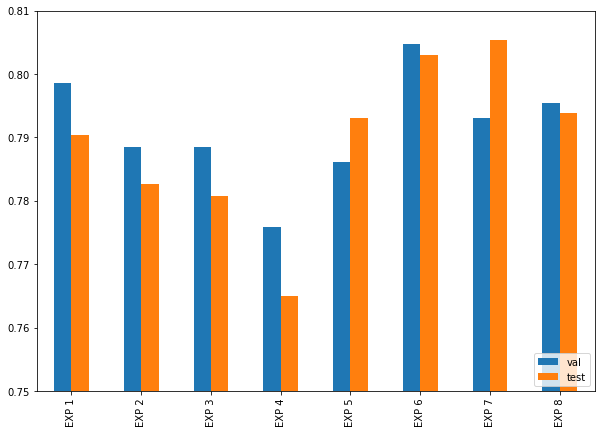

In [403]:
ax = accs_df.T.plot.bar(ylim=(0.75, 0.81), figsize=(10, 7))
ax.legend(loc=4)

In [387]:
# TODO: answer questions

In [390]:
# clearly experiment 6 is the best one! 
best_model = clfs[5]

# Confusion matrix

Text(159.0, 0.5, 'Actual')

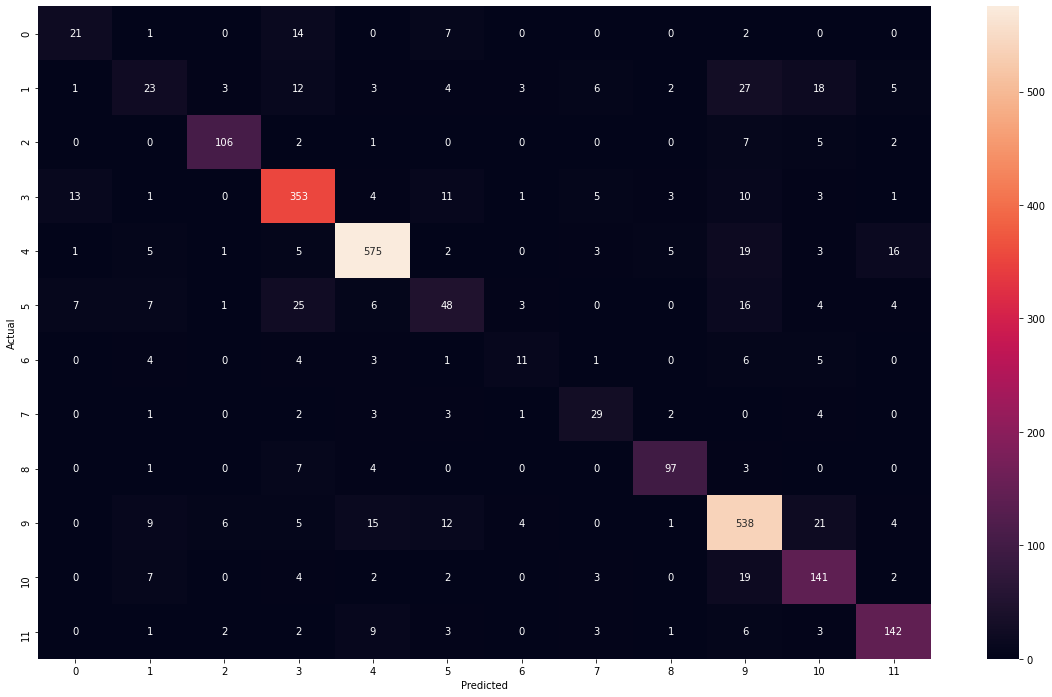

In [434]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_test_preds[5])
plt.figure(figsize=(20, 12))
s = sns.heatmap(conf_mat, annot=True, fmt='.0f')
s.set_xlabel('Predicted')
s.set_ylabel('Actual')

In [435]:
# was a confusion matrix like this asked or were multiple 2x2 matrices asked? 

# Features visualization

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra point)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on the high-dimensional vectors. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>